## Analítica Indicadores vivienda JLDLC

In [ ]:
import pandas as pd 
import numpy as np 
import os
from google.cloud import bigquery
from google.oauth2 import service_account
# declaramos las credenciales al entorno de desarollo
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "..\\..\\bd\\0_docs\\datahub-deacero-adojeda.json"

def Consulta_BQ(consulta):
    """ Funcion que convierte consultas tipo SQL EN PANDAS df"""
    
    client = bigquery.Client()

    query = client.query(consulta)

    df = query.to_dataframe(create_bqstorage_client=True)

    #fact.nom_estado_consignado = fact.nom_estado_consignado.replace({'DISTRITO FEDERAL': 'CIUDAD DE MEXICO'})

    #fact = fact.groupby(["mes_anio", "nom_estado_consignado"]).toneladas_facturadas.sum().unstack(-1).fillna(0)

    df.sort_index(inplace=True, ascending=True)

    return df

query_str = """SELECT 
FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS mes_anio,
cla_cliente_unico, 
cla_cliente,
nom_grupo_estadistico3,
sum(toneladas_facturadas) AS toneladas_facturadas
FROM `datahub-deacero.mart_comercial.comercial`
WHERE 
nom_pais_consignado = "MÉXICO"
AND nom_grupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS')
AND nom_grupo_estadistico3  NOT LIKE '%REBAR%'
AND mes_anio IS NOT NULL
AND fecha >= '2024-01-01'
GROUP BY 1,2,3,4
ORDER BY 1,2,3,4
"""


c:\Users\adojeda\OneDrive - deacero.com\dev\0_envs\.bigquery\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [ ]:
fact = Consulta_BQ(query_str)

count_var = "cla_cliente_unico"

fact_cliente = fact.groupby(["mes_anio", count_var]).toneladas_facturadas.sum().reset_index().sort_values(by = ["mes_anio", "toneladas_facturadas"], ascending = [True, False])

fact_cliente = fact_cliente[fact_cliente.toneladas_facturadas > 0]

fact_cliente["pp"] = fact_cliente.groupby("mes_anio").toneladas_facturadas.apply(lambda x:x.cumsum() /x.sum()).values

fact_cliente["pp"] = fact_cliente["pp"].astype(float).mul(100).round(2)

fact_cliente["toneladas_facturadas"] = fact_cliente["toneladas_facturadas"].astype(float).round(2)

fact_cliente["class"] = np.where(fact_cliente.pp<= 80, "heed_80", "tail_20")

fact_cliente[fact_cliente.mes_anio == "2024-01-01"]

fact_cliente = fact_cliente.groupby(["mes_anio","class"]).agg({count_var: "nunique", "toneladas_facturadas":"sum"}).unstack(-1).round(2)

fact_cliente.loc["tot"] = fact_cliente.mean(axis = 0)

fact_cliente

cla_cliente_unico          toneladas_facturadas            
class                heed_80  tail_20              heed_80     tail_20
mes_anio                                                              
2024-01-01            112.00  1754.00          185953.8900  46706.0900
2024-02-01            120.00  1590.00          126385.3600  31818.9200
2024-03-01            147.00  1507.00          108038.1400  27050.8800
2024-04-01            138.00  1559.00          154176.2400  38663.0900
2024-05-01            123.00  1554.00          147566.0000  37078.6600
2024-06-01             97.00  1504.00          145295.8100  36435.3500
2024-07-01            105.00  1478.00          137109.4800  34523.7300
2024-08-01            100.00  1470.00          156924.9900  39355.0700
2024-09-01            106.00  1368.00          135288.8900  33867.1600
2024-10-01            119.00  1431.00          140902.2000  35220.5600
2024-11-01            110.00  1392.00          152502.6000  38396.2400
2024-12-01            132.00  1228.00          109164.7400  27294.3000
2025-01-01            131.00  1309.00          140681.4500  35384.0000
2025-02-01            143.00  1279.00          124401.6300  31272.8400
2025-03-01            144.00  1341.00          137993.5500  34519.9200
2025-04-01            132.00  1311.00          134594.4200  33765.2900
2025-05-01            136.00  1341.00          134307.4600  33776.4200
2025-06-01            138.00  1322.00          130431.2800  32612.2000
2025-07-01            123.00  1412.00          140503.5400  35297.5700
2025-08-01            121.00  1277.00          127929.2800  32087.1800
tot                   123.85  1421.35          138507.5475  34756.2735

In [ ]:
count_var = "nom_grupo_estadistico3"

fact_cliente = fact.groupby(["mes_anio", count_var]).toneladas_facturadas.sum().reset_index().sort_values(by = ["mes_anio", "toneladas_facturadas"], ascending = [True, False])

fact_cliente = fact_cliente[fact_cliente.toneladas_facturadas > 0]

fact_cliente["pp"] = fact_cliente.groupby("mes_anio").toneladas_facturadas.apply(lambda x:x.cumsum() /x.sum()).values

fact_cliente["pp"] = fact_cliente["pp"].astype(float).mul(100).round(2)

fact_cliente["toneladas_facturadas"] = fact_cliente["toneladas_facturadas"].astype(float).round(2)

fact_cliente["class"] = np.where(fact_cliente.pp<= 80, "heed_80", "tail_20")

fact_cliente[fact_cliente.mes_anio == "2024-01-01"]

fact_cliente = fact_cliente.groupby(["mes_anio","class"]).agg({count_var: "nunique", "toneladas_facturadas":"sum"}).unstack(-1).round(2)

fact_cliente.loc["tot"] = fact_cliente.mean(axis = 0)

fact_cliente

nom_grupo_estadistico3         toneladas_facturadas          
class                     heed_80 tail_20              heed_80   tail_20
mes_anio                                                                
2024-01-01                   19.0   164.0           181437.260  49642.09
2024-02-01                   22.0   157.0           125647.170  32195.26
2024-03-01                   22.0   156.0           107667.970  27145.62
2024-04-01                   20.0   164.0           151583.350  40589.67
2024-05-01                   21.0   159.0           145784.040  37201.74
2024-06-01                   20.0   163.0           142859.220  38057.00
2024-07-01                   22.0   162.0           136782.550  34484.39
2024-08-01                   18.0   174.0           155321.640  40747.38
2024-09-01                   20.0   165.0           134140.640  34753.69
2024-10-01                   20.0   156.0           138256.250  35721.69
2024-11-01                   19.0   161.0           152436.520  38131.37
2024-12-01                   20.0   150.0           108244.620  27868.15
2025-01-01                   20.0   158.0           136178.170  36785.27
2025-02-01                   21.0   152.0           122481.390  32963.60
2025-03-01                   20.0   151.0           136012.820  36294.13
2025-04-01                   19.0   150.0           132752.780  35038.77
2025-05-01                   20.0   150.0           132549.990  35349.02
2025-06-01                   20.0   154.0           128965.240  33909.53
2025-07-01                   21.0   154.0           140012.750  35536.35
2025-08-01                   20.0   152.0           127621.270  32154.28
tot                          20.2   157.6           136836.782  35728.45

In [ ]:
count_var = "cla_cliente"

fact_cliente = fact.groupby(["mes_anio", count_var]).toneladas_facturadas.sum().reset_index().sort_values(by = ["mes_anio", "toneladas_facturadas"], ascending = [True, False])

fact_cliente = fact_cliente[fact_cliente.toneladas_facturadas > 0]

fact_cliente["pp"] = fact_cliente.groupby("mes_anio").toneladas_facturadas.apply(lambda x:x.cumsum() /x.sum()).values

fact_cliente["pp"] = fact_cliente["pp"].astype(float).mul(100).round(3)

fact_cliente["class"] = np.where(fact_cliente.pp <= 80, "first_80", "tail_20")

fact_cliente[fact_cliente.mes_anio == "2024-01-01"]

fact_cliente.groupby(["mes_anio","class"]).agg({count_var: "nunique", "toneladas_facturadas":"sum"}).unstack(-1)

cla_cliente         toneladas_facturadas                 
class         first_80 tail_20             first_80          tail_20
mes_anio                                                            
2024-01-01         196    1976     186487.180065800  46856.105389200
2024-02-01         190    1795     126540.555562300  31764.625657700
2024-03-01         211    1685     108735.000951500  27231.816498000
2024-04-01         225    1761     154700.605342600  38833.953462600
2024-05-01         199    1753     148899.078612800  37256.152505000
2024-06-01         171    1733     145759.031180000  36547.313539500
2024-07-01         182    1691     137927.678350000  34637.103460200
2024-08-01         159    1690     157630.328320000  39439.081008600
2024-09-01         158    1560     138123.365945000  34653.220217700
2024-10-01         173    1603     141377.155045900  35450.818744100
2024-11-01         163    1548     153428.438776300  38415.541687600
2024-12-01         183    1362     109634.805347900  27515.756773600
2025-01-01         188    1459     141400.845335800  35501.974559000
2025-02-01         204    1411     125184.066593300  31389.786382900
2025-03-01         207    1474     138432.635977000  34610.576230000
2025-04-01         196    1457     135244.154075500  33962.447771600
2025-05-01         203    1486     134883.421209700  33740.332054000
2025-06-01         205    1467     130662.736420000  32808.513989900
2025-07-01         186    1576     140871.411390000  35322.978067300
2025-08-01         183    1416     128083.965878500  32026.191055900

In [ ]:
consultas = {"varilla" : """SELECT 
FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS mes_anio,
nom_estado_consignado,
sum(toneladas_facturadas) AS toneladas_facturadas
FROM `datahub-deacero.mart_comercial.comercial`
WHERE 
nom_grupo_estadistico2 = "VARILLA "
AND  nom_pais_consignado = "MÉXICO"
AND nom_grupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS')
AND nom_grupo_estadistico3  NOT LIKE '%REBAR%'
AND mes_anio IS NOT NULL
GROUP BY 1,2
ORDER BY 1,2
""", 

"VARILLA_3_8": """SELECT 
FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS mes_anio,
nom_estado_consignado,
sum(toneladas_facturadas) AS toneladas_facturadas
FROM `datahub-deacero.mart_comercial.comercial`
WHERE nom_pais_consignado = "MÉXICO"
AND nom_grupo_estadistico3 = "VARILLA 3/8"
AND nom_grupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS')
AND mes_anio IS NOT NULL
GROUP BY 1,2
ORDER BY 1,2
""",

"negros_antaac" : """SELECT 
FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS mes_anio,
nom_estado_consignado,
sum(toneladas_facturadas) AS toneladas_facturadas
FROM `datahub-deacero.mart_comercial.comercial`
WHERE nom_pais_consignado = "MÉXICO"
AND nom_grupo_estadistico2 = "NEGROS ANTAAC"
AND nom_grupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS')
AND mes_anio IS NOT NULL
GROUP BY 1,2
ORDER BY 1,2
""",

"mezcla_vivenda" : """SELECT 
FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS mes_anio,
nom_estado_consignado,
sum(toneladas_facturadas) AS toneladas_facturadas
FROM `datahub-deacero.mart_comercial.comercial`
WHERE nom_pais_consignado = "MÉXICO"
AND clave_articulo IN ("1199", "714", "717", "720", "716", "715", "61669", "61671", "80309", "80310", "605", "603", "602", "601", "3120", "2343", "30764")
AND nom_grupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS')
AND mes_anio IS NOT NULL
GROUP BY 1,2
ORDER BY 1,2
"""
}

In [ ]:
import pandas as pd 
import numpy as np 
import os
from google.cloud import bigquery
from google.oauth2 import service_account
# declaramos las credenciales al entorno de desarollo
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "..\\..\\bd\\0_docs\\datahub-deacero-adojeda.json"

if False: 
  list_df = {}
  for key, query_str in consultas.items():
      client = bigquery.Client()
      consulta = query_str
      query = client.query(consulta)
      fact = query.to_dataframe(create_bqstorage_client=True)
      fact.nom_estado_consignado = fact.nom_estado_consignado.replace({'DISTRITO FEDERAL': 'CIUDAD DE MEXICO'})
      fact = fact.groupby(["mes_anio", "nom_estado_consignado"]).toneladas_facturadas.sum().unstack(-1).fillna(0)
      fact.sort_index(inplace=True, ascending=True)
      list_df[key] = fact

  to_replace = {'CIUDAD DE MÉXICO' :'CIUDAD DE MEXICO' ,
    'COAHUILA DE ZARAGOZA': 'COAHUILA',
    'MICHOACÁN DE OCAMPO' : 'MICHOACAN',
    'MÉXICO': 'MEXICO',
    'NUEVO LEÓN': 'NUEVO LEON',
    'QUERÉTARO': 'QUERETARO',
    'SAN LUIS POTOSÍ' : 'SAN LUIS POTOSI',
    'VERACRUZ DE IGNACIO DE LA LLAVE':'VERACRUZ',
    'YUCATÁN': 'YUCATAN'}

  ruv = pd.read_excel(r"..\RUV_v2\outputs\ruv_historico.xlsx")

  ruv.estado = ruv.estado.str.upper().replace(to_replace) 

  ruv = ruv.groupby(["fecha", "estado"]).viviendas.sum().unstack(-1) 
  
  ruv.sort_index(inplace=True, ascending=True)

  list_df["ruv"] = ruv

# Prototipo Alertas SKU PL

## 1) Árbol de decisión análisis de Datos PL SKU
El árbol genera un etiquetado de que análisis aplicar en caso de que existan las siguientes reglas de negocio

* El PL-SKU cuenta con la cantidad suficiente de Registros.
* El PL-SKU cuenta con Volumen Facturado en los últimos 6 meses previo a la fecha de cierre (Fact>0).
* El PL-SKU tiene algun valor de pronóstico (PVO/PV/BP)
* El PL-SKU cuenta con algun tipo de Deuda (Libre, mes actual o mes siguiente)

Generando los siguientes **Análisis** y **Alertas**

* Análisis de Intermitencia / Pedidos Nuevos & Bajas
* Analisis de PVO vs Deuda vs Facturación
* Alertas de Falta de Pronostico
* Alertas de Falta de Pronostico y Deuda
* Analisis de riesgo por falta de Facturación con deuda
* Alertas de Error de Pronóstico mal desagregado
* Alertas Error de Deuda no reflejada en pronostico
* Alertas de Perdida SKU PL


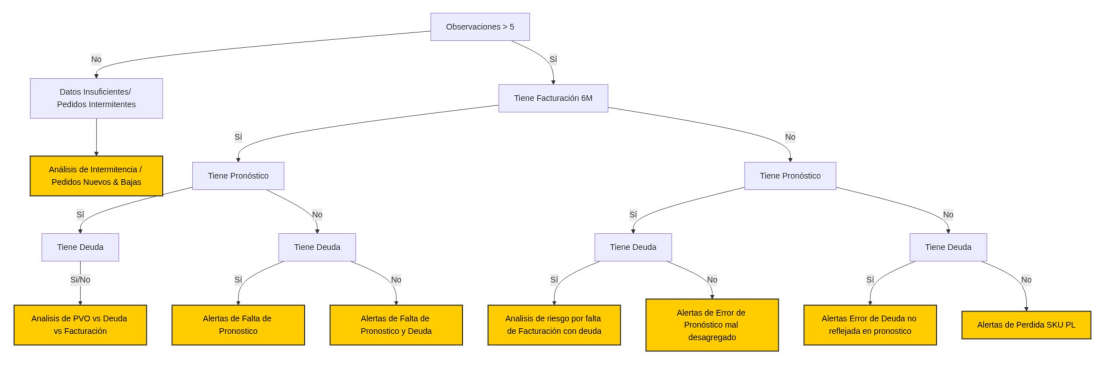

In [139]:
import base64
import io
import requests
from PIL import Image as PILImage
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    img_url = 'https://mermaid.ink/img/' + base64_string
    img = PILImage.open(io.BytesIO(requests.get(img_url).content))
    plt.figure(figsize=(14, 14))
    plt.imshow(img)
    plt.axis('off')
    plt.savefig('image.png', dpi=300)
    plt.show()

mm("""
%%{init: {'themeVariables': { 'primaryColor': '#ffcc00', 'nodeTextColor': '#000000'}}}%%
graph TD;
    classDef final fill:#ffcc00,stroke:#333,stroke-width:2px,color:#000;

    A0[Observaciones > 5] -->|Sí| A[Tiene Facturación 6M]
    A0 -->|No| Err[Datos Insuficientes/ Pedidos Intermitentes]
    Err --> Err2[Análisis de Intermitencia / Pedidos Nuevos & Bajas]
    
    A -->|Sí| B[Tiene Pronóstico]
    B -->|Sí| C[Tiene Deuda]
    C -->|Si/No| D[Analisis de PVO vs Deuda vs Facturación]

    B -->|No| F[Tiene Deuda]
    F -->|Sí| G[Alertas de Falta de Pronostico]
    F -->|No| H[Alertas de Falta de Pronostico y Deuda]

    A -->|No| I[Tiene Pronóstico]
    I -->|Sí| J[Tiene Deuda]
    J -->|Sí| K[Analisis de riesgo por falta de Facturación con deuda]
    J -->|No| L[Alertas de Error de Pronóstico mal desagregado]

    I -->|No| M[Tiene Deuda]
    M -->|Sí| N[Alertas Error de Deuda no reflejada en pronostico]
    M -->|No| O[Alertas de Perdida SKU PL]

    class Err2,D,E,G,H,K,L,N,O final;
""")


## Proceso Arbol Decisión Principal

### Tratamiento de datos

Generar columnas **bol** por ID para las siguientes condiciones todos los id's tienen que estar etiquetados.
* **tiene_registros_suficientes**:  PL-SKU cuenta con la cantidad suficiente de Registros.
* **tiene_fact_6m**: El PL-SKU cuenta con Volumen Facturado en los últimos 6 meses previo a la fecha de cierre (Fact>0).
* **tiene_pronostico**: El PL-SKU tiene algun valor de pronóstico (PVO/PV/BP)
* **tiene_deuda**: El PL-SKU cuenta con algun tipo de Deuda (Libre, mes actual o mes siguiente)


In [ ]:
import pandas as pd 
import numpy as np 
import os
from google.cloud import bigquery
from google.oauth2 import service_account
pd.set_option('display.max_columns', None)

# declaramos las credenciales al entorno de desarollo
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "..\\..\\bd\\0_docs\\datahub-deacero-adojeda.json"z

if False: 
    # consulta SQL indicadores
    client = bigquery.Client()
    consulta = """
        WITH datos_agrupados AS (
        SELECT
            FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS mes_anio,
            nom_grupo AS NombreGrupo,
            nom_direccion AS NombreDireccion,
            nom_subdireccion AS NombreSubdireccion,
            nom_familia_asociada,
            nom_ubicacion,
            nom_grupo_estadistico1 AS NombreGrupoEstadistico1,
            nom_grupo_estadistico2 AS NombreGrupoEstadistico2,
            nom_grupo_estadistico3 AS NombreGrupoEstadistico3,
            nom_grupo_estadistico4 AS NombreGrupoEstadistico4,
            nom_articulo,
            SUM(toneladas_pvo) AS toneladas_pvo,
            SUM(toneladas_plan_ventas) AS toneladas_plan_ventas,
            SUM(toneladas_facturadas) AS toneladas_facturadas,
            SUM(toneladas_deuda_libre) AS toneladas_deuda_libre, 
            SUM(toneladas_deuda_mes_resto) AS toneladas_deuda_mes_resto, 
            SUM(toneladas_deuda_mes_siguiente) AS toneladas_deuda_mes_siguiente 
        FROM `datahub-deacero.mart_comercial.comercial`
        WHERE
            fecha >= '2022-01-01'
            AND fecha < '2026-01-01'
            AND nom_grupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS')
            AND nom_subdireccion NOT IN ('EXCEDENTES ACEROS','EXCEDENTES ALAMBRES','RESTO ALAMBRES','RESTO INGETEK')
            AND nom_grupo_estadistico1 NOT IN ('CHATARRA','DEACERO POWER','INTERNAS PRODUCCION ','LOGÍSTICA','SEGUNDAS')
            AND nom_grupo_estadistico2 NOT IN ('SEGUNDAS / EXCEDENTES','CHQ')
            AND nom_grupo_estadistico3 NOT IN ('DESPERDICIO','ALAMBRON SEGUNDAS','ALAMBRON EXCEDENTES','ALAMBRON TERCEROS','ALAMBRON OTROS','PILOTES','PISO','POLIZAS')
            AND nom_articulo IS NOT NULL
            AND nom_ubicacion IS NOT NULL
        GROUP BY 1,2,3,4,5,6,7,8,9,10,11
        )
        SELECT *
        FROM datos_agrupados
        ORDER BY  1,2,3,4,5,6,7,8,9,10,11
            """
    
    query = client.query(consulta)
    pvo = query.to_dataframe(create_bqstorage_client=True)
    pvo["valid_ton"] = abs(pvo["toneladas_plan_ventas"].astype(float).fillna(0) + pvo["toneladas_pvo"].astype(float).fillna(0) + pvo["toneladas_facturadas"].astype(float).fillna(0)\
          + pvo["toneladas_deuda_libre"].astype(float).fillna(0) + pvo["toneladas_deuda_mes_resto"].astype(float).fillna(0) + + pvo["toneladas_deuda_mes_siguiente"].astype(float).fillna(0))
    pvo_v = pvo[pvo["valid_ton"] != 0]
    pvo_v.to_csv(r".\consultas\base_fin.csv", index=False)

#------------------------------------------------------------------------------------------------------------------------
date_tdy = pd.to_datetime("today").normalize().replace(day = 1)

date_start = pd.to_datetime("today").normalize().replace(day = 1).replace(year = date_tdy.year - 3)

date_6m = pd.to_datetime("today").normalize().replace(day = 1).replace(month = date_tdy.month - 6)
#------------------------------------------------------------------------------------------------------------------------

data = pd.read_csv(r".\consultas\base_fin.csv", parse_dates=["mes_anio"], engine="pyarrow")

# eliminamos volumen articulos nulos
data = data[data.nom_articulo.notna()]

# eliminamos volumen ubicacion nulos
data = data[data.nom_ubicacion.notna()]

data["mes_anio"] = pd.to_datetime(data["mes_anio"])

data = data[data["mes_anio"] >= date_start]

# aplicamos strip (eliminacion de espacios nombre ubicacion)
data.nom_ubicacion = data.nom_ubicacion.str.strip()

# mapeamos reglas de negocio para agrupar articulos 
data["nom_articulo_2"] = np.where(data["NombreGrupoEstadistico1"].str.contains("PALANQUILLA"),
                      "G1_" + data["NombreGrupoEstadistico1"] ,
                      np.where(
                          data.NombreGrupoEstadistico3.isin(["PERFILES","SOLUCIONES","VARILLA"]),
                            "G3_" +data.nom_familia_asociada,
                            np.where(data.NombreGrupoEstadistico3.isin(["ALAMBRON"]),
                                     "G4_" + data.NombreGrupoEstadistico4, 
                             "SKU_" + data.nom_articulo)))

# creamos id
data["id"] = data["nom_ubicacion"] + "_" + data["nom_articulo_2"]

# creamos catalogo id
catalogo_id = data[["id", "nom_ubicacion","nom_articulo_2", "nom_articulo", "NombreGrupoEstadistico1", "NombreGrupoEstadistico2", "NombreGrupoEstadistico3", "NombreGrupoEstadistico4"]].drop_duplicates().copy()

data_ = data.copy()

data = data.groupby(["id","mes_anio"]).agg({"toneladas_facturadas":"sum",
                                             "toneladas_deuda_libre":"sum",
                                               "toneladas_deuda_mes_resto": "sum",
                                                 "toneladas_deuda_mes_siguiente": "sum",
                                                   "toneladas_plan_ventas":"sum",
                                                     "toneladas_pvo": "sum"
                                                     }).reset_index()

### Creación de Indicadores para árbol decisión

In [ ]:
# De los datos agregados a nivel SKU PL - ID se procede a calcular el mape a nivel id - Mes año
data.toneladas_facturadas = data.toneladas_facturadas.fillna(0) 
data["MAPE_PVO"] = np.where(
                        (data.toneladas_facturadas < 1) & (data.toneladas_pvo < 1), 0,
                        np.where(
                            ((data.toneladas_facturadas < 1) & (data.toneladas_pvo >= 1)) | ((data.toneladas_facturadas >= 1) & (data.toneladas_pvo < 1)), 1,
                            np.where(
                                (data.toneladas_facturadas >= 1) & (data.toneladas_pvo >= 1),
                                np.abs(data.toneladas_facturadas - data.toneladas_pvo) / np.where(data.toneladas_pvo != 0, data.toneladas_pvo, 1),  # Evita división por cero
                                0
                            )
                        )
                    )

# TOPAMOS EL VALOR MÁXIMO A 2
data["MAPE_PVO"] = np.minimum(data["MAPE_PVO"],2)

# CREAMOS VALOR WMAPE # multiplicaccion d mape por su tonelaje 
data["WMAPE_PVO"] = np.where(data.toneladas_facturadas > 0, data.toneladas_facturadas.mul(data.MAPE_PVO), np.nan)

In [ ]:
# TIENE_REGISTROS_SUFICIENTES TOTAL HISTORIA 2023 - TDY
count_registro_id = data[data.toneladas_facturadas.fillna(0) != 0 ].groupby("id").toneladas_facturadas.count().reset_index().rename(columns ={"toneladas_facturadas": "count_mcc"} )

count_registro_id["tiene_registros_suficientes"] = np.where(count_registro_id.count_mcc > 5, True, False)

# tiene_fact_6m CALCULAMOS LA ULTIMA FECHA CON FACTURACIÓN 
last_purchase = data[data.toneladas_facturadas.fillna(0) != 0 ].groupby("id").mes_anio.max()

# A LA FECHA ACTUAL SE LE RESTA LA ULTIMA FECHA CON FACTURACIÓN PARA CALCULAR MESES SIN COMPRA MSC
last_purchase = last_purchase.apply(lambda x : round((date_tdy - x).days / 30)).reset_index().rename(columns ={"mes_anio": "msc"})

# CALCULAMOS VARIABLE BOLEANA QUE PREGUNTA SI TINE MSC MENOR O IGUAL A 6
last_purchase["tiene_fact_6m"] = np.where(last_purchase.msc<=6, True, False)

# DEL MES ACTUAL SE CALCULAN LAS VARIABLES DE PRONOSTICO
last_forecast = data[data.mes_anio == date_tdy].groupby("id").agg({"toneladas_facturadas":"sum", "toneladas_plan_ventas":"sum", "toneladas_pvo": "sum"}).reset_index()

# VARIABLE BOLEANA QUE ES SI EN CASO DE QUE EL SKU TENGA PVO O PV
last_forecast["tiene_pronostico"] = np.where((last_forecast.toneladas_plan_ventas > 0) | (last_forecast.toneladas_pvo > 0), True, False)

# CALCULO DE LA DEUDA DEL MES EN CURSO
deuda = data[data.mes_anio == date_tdy].groupby("id").agg({"toneladas_deuda_libre":"sum", "toneladas_deuda_mes_resto": "sum", "toneladas_deuda_mes_siguiente": "sum"}).reset_index()

# VARIABLE BOLEANA PARA PREGUNTAR SI SE TIENE DEUDA
deuda["tiene_deuda"] = np.where((deuda.toneladas_deuda_libre > 0) | (deuda.toneladas_deuda_mes_resto > 0) |(deuda.toneladas_deuda_mes_siguiente), True, False)

# MERGE 1 
tabla_arbol = count_registro_id.merge(last_purchase, how = "outer", on = "id", validate = "1:1")

# MERGE 2
tabla_arbol = tabla_arbol.merge(last_forecast, how = "outer", on = "id", validate = "1:1").sort_values(by = "count_mcc")

# MERGE 3
tabla_arbol = tabla_arbol.merge(deuda, how = "outer", on = "id", validate = "1:1").sort_values(by = "count_mcc")

# reemplazamos valores null
tabla_arbol = tabla_arbol.fillna({'count_mcc': 0,
                                  'msc': 60,
                                  #'toneladas_plan_ventas' : np.nan,
                                  #'toneladas_pvo': np.nan,
                                  'tiene_pronostico': False,
                                  'toneladas_deuda_libre': 0,
                                  'toneladas_deuda_mes_resto': 0,
                                  'toneladas_deuda_mes_siguiente' : 0,
                                  'tiene_deuda': False,
                                  "tiene_registros_suficientes": False,
                                  "tiene_fact_6m":False
                                  }).reset_index(drop = True)

tabla_arbol.head(1)

C:\Users\adojeda\AppData\Local\Temp\ipykernel_67816\3330863079.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tabla_arbol = tabla_arbol.fillna({'count_mcc': 0,


,id,count_mcc,tiene_registros_suficientes,msc,tiene_fact_6m,toneladas_facturadas,toneladas_plan_ventas,toneladas_pvo,tiene_pronostico,toneladas_deuda_libre,toneladas_deuda_mes_resto,toneladas_deuda_mes_siguiente,tiene_deuda
0,"ALAMBRES MÉXICO_SKU_AB, ALAMBRE PULIDO ACABADO...",1.0,False,7.0,False,0.0,0.18866,0.18866,True,0.0,0.0,0.0,False


In [ ]:
def clasificar_pl_sku_np(df):
    condiciones = [
        ~df['tiene_registros_suficientes'], #1
        df['tiene_registros_suficientes'] & ~df['tiene_fact_6m'] & df['tiene_pronostico'] & df['tiene_deuda'], # 2
        df['tiene_registros_suficientes'] & ~df['tiene_fact_6m'] & df['tiene_pronostico'] & ~df['tiene_deuda'], # 3
        df['tiene_registros_suficientes'] & ~df['tiene_fact_6m'] & ~df['tiene_pronostico'] & df['tiene_deuda'], # 4
        df['tiene_registros_suficientes'] & ~df['tiene_fact_6m'] & ~df['tiene_pronostico'] & ~df['tiene_deuda'], # 5
        df['tiene_registros_suficientes'] & df['tiene_fact_6m'] & df['tiene_pronostico'], #6
        df['tiene_registros_suficientes'] & df['tiene_fact_6m'] & ~df['tiene_pronostico'] & df['tiene_deuda'], #7
        df['tiene_registros_suficientes'] & df['tiene_fact_6m'] & ~df['tiene_pronostico'] & ~df['tiene_deuda'], #8
    ]

    resultados = [
        "Datos Insuficientes/ Pedidos Intermitentes", #1
        "Analisis de riesgo por falta de Facturación con deuda", #2
        "Alertas de Error de Pronóstico mal desagregado", #3
        "Alertas Error de Deuda no reflejada en pronostico", #4
        "Alertas de Perdida SKU PL", #5
        "Analisis de PVO vs Deuda vs Facturación", #6
        "Alertas de Falta de Pronóstico", #7
        "Alertas de Falta de Pronóstico y Deuda" #8
    ]

    df['analisis'] = np.select(condiciones, resultados, default="Sin Clasificación")
    
    df['analisis'] = df['analisis'].fillna("Sin Clasificación")
    return df

tabla_arbol = clasificar_pl_sku_np(tabla_arbol)

display(tabla_arbol.groupby("analisis").id.nunique())

tabla_arbol.head(1)

analisis
Alertas Error de Deuda no reflejada en pronostico          107
Alertas de Error de Pronóstico mal desagregado             435
Alertas de Falta de Pronóstico                             496
Alertas de Falta de Pronóstico y Deuda                    1409
Alertas de Perdida SKU PL                                 4046
Analisis de PVO vs Deuda vs Facturación                   5974
Analisis de riesgo por falta de Facturación con deuda       26
Datos Insuficientes/ Pedidos Intermitentes               21988
Name: id, dtype: int64

,id,count_mcc,tiene_registros_suficientes,msc,tiene_fact_6m,toneladas_facturadas,toneladas_plan_ventas,toneladas_pvo,tiene_pronostico,toneladas_deuda_libre,toneladas_deuda_mes_resto,toneladas_deuda_mes_siguiente,tiene_deuda,analisis
0,"ALAMBRES MÉXICO_SKU_AB, ALAMBRE PULIDO ACABADO...",1.0,False,7.0,False,0.0,0.18866,0.18866,True,0.0,0.0,0.0,False,Datos Insuficientes/ Pedidos Intermitentes


In [ ]:
# CALCULO DE MAPE PROMEDIO POR ID ULTIMOS 6M ANTES DE CORTE primero promediar por mes enseguida por grupo 
# RECORDEMOS QUE EN ESTE CONJUNTO DE DATA SE ELIMINARON CEROS ???

mape = data[(data.mes_anio >= date_6m) & (data.mes_anio< date_tdy)][["id","mes_anio","MAPE_PVO", "WMAPE_PVO", "toneladas_facturadas"]]

mape["analisis"] = mape.id.map(tabla_arbol.groupby("id").analisis.last().to_dict()).fillna("NA")

display(mape.groupby("analisis").id.nunique())

resultados_6m_map = mape.groupby(["analisis","mes_anio"]).agg({"MAPE_PVO":"mean", "WMAPE_PVO": "sum", "toneladas_facturadas": "sum"}).reset_index().groupby("analisis").mean().drop(columns = "mes_anio")

resultados_6m_map["WMAPE_PVO"] = resultados_6m_map["WMAPE_PVO"].div(resultados_6m_map.toneladas_facturadas)

resultados_6m_map = resultados_6m_map.rename(columns={"toneladas_facturadas":"fact_acomulada"})

resultados_6m_map["fact_acomulada"] = resultados_6m_map["fact_acomulada"].round(2)

resultados_6m_map ["pp"] = resultados_6m_map["fact_acomulada"].div(resultados_6m_map["fact_acomulada"].sum()).mul(100).round(2)

resultados_6m_map

analisis
Alertas Error de Deuda no reflejada en pronostico          57
Alertas de Error de Pronóstico mal desagregado            379
Alertas de Falta de Pronóstico                            489
Alertas de Falta de Pronóstico y Deuda                   1379
Alertas de Perdida SKU PL                                1391
Analisis de PVO vs Deuda vs Facturación                  5971
Analisis de riesgo por falta de Facturación con deuda      23
Datos Insuficientes/ Pedidos Intermitentes               9133
NA                                                       4231
Name: id, dtype: int64

,MAPE_PVO,WMAPE_PVO,fact_acomulada,pp
analisis,,,,
Alertas Error de Deuda no reflejada en pronostico,0.342058,NaN,0.00,0.00
Alertas de Error de Pronóstico mal desagregado,0.298669,NaN,0.00,0.00
Alertas de Falta de Pronóstico,0.618309,1.071224,9365.78,4.24
Alertas de Falta de Pronóstico y Deuda,0.504011,0.976896,6436.66,2.91
Alertas de Perdida SKU PL,0.285927,NaN,0.00,0.00
Analisis de PVO vs Deuda vs Facturación,0.556097,0.713525,182273.65,82.48
Analisis de riesgo por falta de Facturación con deuda,0.514426,NaN,0.00,0.00
Datos Insuficientes/ Pedidos Intermitentes,0.374544,1.075167,22904.25,10.36
NA,0.099968,NaN,0.00,0.00


In [ ]:
out = tabla_arbol.groupby("analisis").agg({"toneladas_facturadas":"sum",
                                            "id": "nunique",
                                              "toneladas_deuda_libre":"sum",
                                                "toneladas_deuda_mes_resto": "sum",
                                                  "toneladas_deuda_mes_siguiente": "sum",
                                                    "toneladas_plan_ventas":"sum",
                                                      "toneladas_pvo": "sum"}).sort_values(by = "toneladas_facturadas",ascending= False).round(2)

out = out.merge(resultados_6m_map, how = "left", left_index=True, right_index=True)

out.loc["total",:] = out.sum(axis = 0)

out.fillna("-")

,toneladas_facturadas,id,toneladas_deuda_libre,toneladas_deuda_mes_resto,toneladas_deuda_mes_siguiente,toneladas_plan_ventas,toneladas_pvo,MAPE_PVO,WMAPE_PVO,fact_acomulada,pp
analisis,,,,,,,,,,,
Analisis de PVO vs Deuda vs Facturación,104378.15,5974.0,73104.11,36833.48,31504.92,206275.40,208285.00,0.556097,0.713525,182273.65,82.48
Datos Insuficientes/ Pedidos Intermitentes,24247.05,21988.0,32868.45,13068.78,23207.49,23422.90,30101.72,0.374544,1.075167,22904.25,10.36
Alertas de Falta de Pronóstico,7312.26,496.0,4131.04,2613.90,5776.70,0.00,0.00,0.618309,1.071224,9365.78,4.24
Alertas de Falta de Pronóstico y Deuda,1728.51,1409.0,0.00,0.00,0.00,0.00,0.00,0.504011,0.976896,6436.66,2.91
Alertas Error de Deuda no reflejada en pronostico,0.00,107.0,6217.84,34.96,2220.54,0.00,0.00,0.342058,-,0.00,0.00
Alertas de Error de Pronóstico mal desagregado,0.00,435.0,0.00,0.00,0.00,6629.29,6645.59,0.298669,-,0.00,0.00
Alertas de Perdida SKU PL,0.00,4046.0,0.00,0.00,0.00,0.00,0.00,0.285927,-,0.00,0.00
Analisis de riesgo por falta de Facturación con deuda,0.00,26.0,170.54,3.01,15.76,61.52,61.52,0.514426,-,0.00,0.00
total,137665.97,34481.0,116491.98,52554.13,62725.41,236389.11,245093.83,3.494041,3.836811,220980.34,99.99


### 1) Análisis de PVO vs Deuda vs Fact

las condiciones para entrar a este analisis son las siguientes : 
* son SKU-PL que tienen registros suficientes (+6)
* Tienen almenos 1 facturación en los ultimos 6m
* Cuentan con pronostico de venta

en total son 6.0K Indicadores los cuales se analizan para

1) Encontrar aquellos que sean propensos a tener errores en Deuda/PVO
2) Analisis de Clustering para encontrar aquellos productos/SKUs que se comporten como series de tiempo
3) Otros

<Axes: xlabel='count_mcc'>

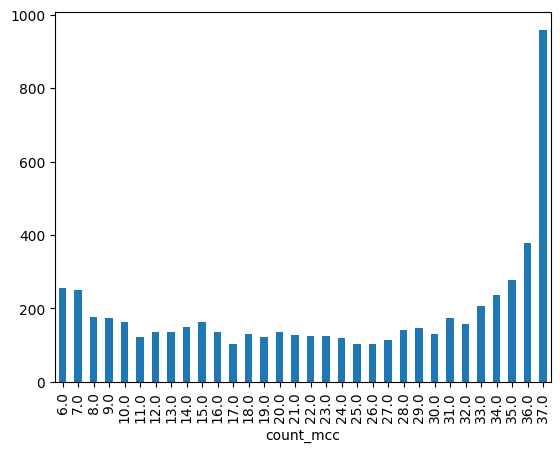

In [8]:
# distribución de OBSERVACIONES
id_a1 = tabla_arbol[tabla_arbol.analisis == "Analisis de PVO vs Deuda vs Facturación"].id.unique()  

# vista 1 barplot
tabla_arbol[tabla_arbol.id.isin(id_a1)].count_mcc.value_counts().sort_index().plot(kind= "bar")

<Axes: xlabel='mes_anio'>

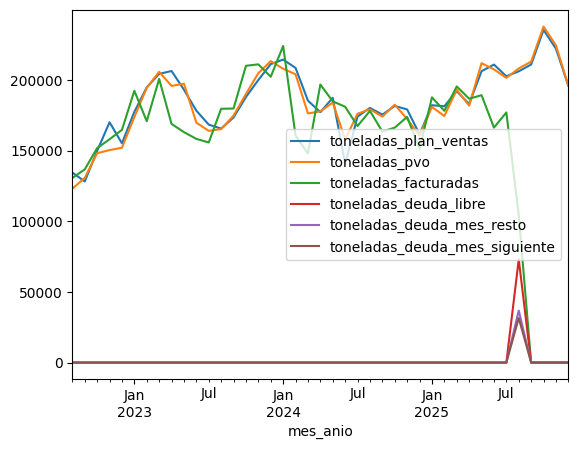

In [9]:
# comparacion de volumen
data[data.id.isin(id_a1)].groupby("mes_anio").agg({"toneladas_plan_ventas":"sum", "toneladas_pvo" :"sum", "toneladas_facturadas":"sum", "toneladas_deuda_libre":"sum", "toneladas_deuda_mes_resto": "sum", "toneladas_deuda_mes_siguiente": "sum"}).plot()

In [10]:
import pandas as pd

# Cargar tus datos
df = data_[data_.id.isin(id_a1)].groupby(["mes_anio", "id"]).toneladas_facturadas.sum().reset_index()  # Asegúrate de tener las columnas: id, mes_anio, toneladas_facturadas

df = df[df['toneladas_facturadas'] > 0]  # Filtrar solo las filas con toneladas_facturadas > 0

comb_tot = df.id.nunique()

print("total de combinaciones de PL & SKU :{}".format(comb_tot))

# Convertir mes_anio a formato de fecha
df['mes_anio'] = pd.to_datetime(df['mes_anio'], format='%Y-%m')

df = df.loc[df["mes_anio"] < date_tdy, :]  # Filtrar por fecha si es necesario

print(df.mes_anio.max())

# Crear todas las combinaciones posibles de id y mes_anio
ids = df['id'].unique()

# imputar ceros
meses = pd.date_range(start=df['mes_anio'].min(), end=df['mes_anio'].max(), freq='MS')

# crar combinacion mes id para colocar datos.
combinaciones = pd.MultiIndex.from_product([ids, meses], names=['id', 'mes_anio'])

# Reindexar y rellenar con 0 donde no haya facturación
df_completo = df.set_index(['id', 'mes_anio']).reindex(combinaciones, fill_value=0).reset_index()

total de combinaciones de PL & SKU :5974
2025-07-01 00:00:00


In [11]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters 

settings = ComprehensiveFCParameters()


# Definir parámetros personalizados para tsfresh


selected_features = {
    'linear_trend': [ {'attr': 'pvalue'}, {'attr': 'slope'}], #{'attr': 'intercept'}
    'autocorrelation': [{'lag': i} for i in range(0, 13)],
    'fft_coefficient': [{'coeff': i, 'attr': 'abs'} for i in range(0, 18)],
    'standard_deviation': None,
    'approximate_entropy': [{'m': 2, 'r': 0.2}],
    'skewness': None,
    'kurtosis': None,
    'augmented_dickey_fuller': [{'attr': 'pvalue'}],
    'binned_entropy': [{'max_bins': 12}],
    'cid_ce': [{'normalize': True}],
    #'length': None,
    'count_above_mean': None,
    #'count_below_mean': None,
    'number_peaks': [{'n': 5}],
    'variation_coefficient': None,
    'value_count': [{'value': 0}]  # Conteo explícito de ceros
    }

X = extract_features(df_completo.iloc[:,:3], 
                     column_id='id', 
                     column_sort='mes_anio',
                     default_fc_parameters=selected_features,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

print(X.shape)

# Eliminamos columnas con valores unicos ["repetidos entre todas las series"]
X = X.drop(columns = X.columns[X.apply(lambda x: x.nunique())== 1].values)

print(X.shape)

Feature Extraction: 100%|██████████| 20/20 [00:14<00:00,  1.39it/s]


(5974, 44)
(5974, 44)


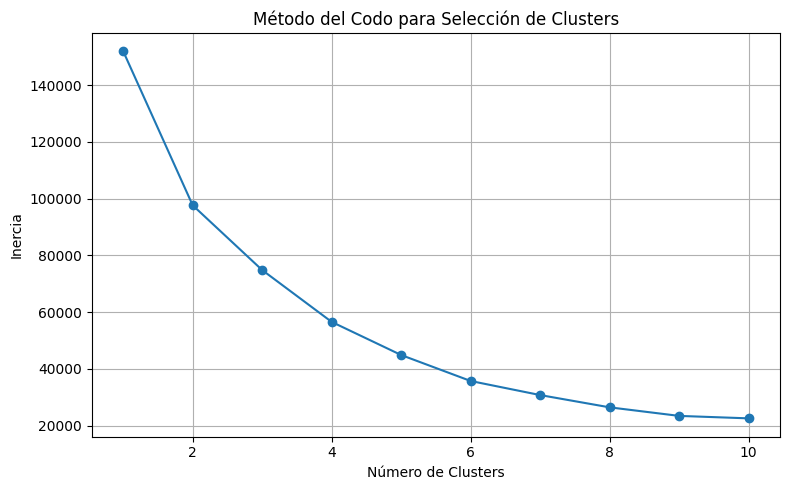

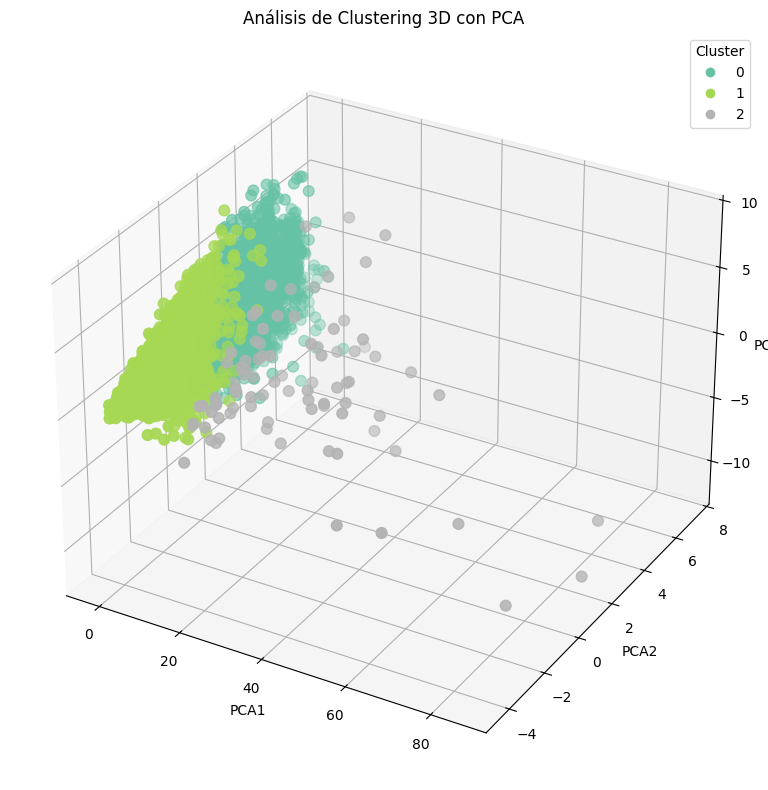

Ranking de variables más importantes para el clustering:
1. toneladas_facturadas__binned_entropy__max_bins_12 	  (F-score:4610.76)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,0.932811,0.360024,0.126931,0.672171,0.870975,1.126578,2.290443
1,3770.0,1.842767,0.344333,0.694762,1.604265,1.909537,2.121876,2.456590
2,87.0,1.899323,0.401999,0.378387,1.697702,2.046109,2.202287,2.416159


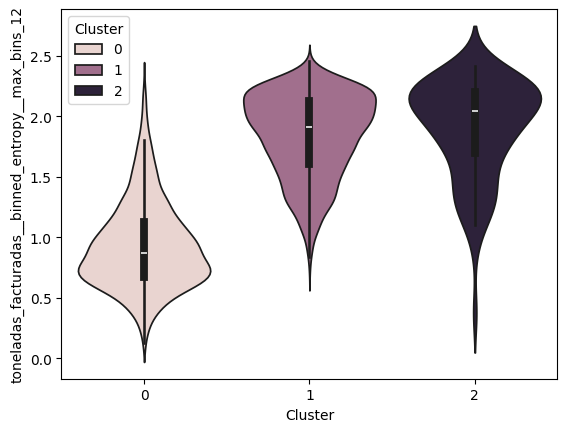

2. toneladas_facturadas__standard_deviation 	  (F-score:4367.71)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,16.456093,36.469942,0.000461,0.363307,2.447236,14.768097,354.860291
1,3770.0,17.438688,37.838647,0.000783,0.550782,2.355982,13.693489,316.275518
2,87.0,602.186486,371.234844,273.061412,333.473874,458.100730,788.197425,2075.568988


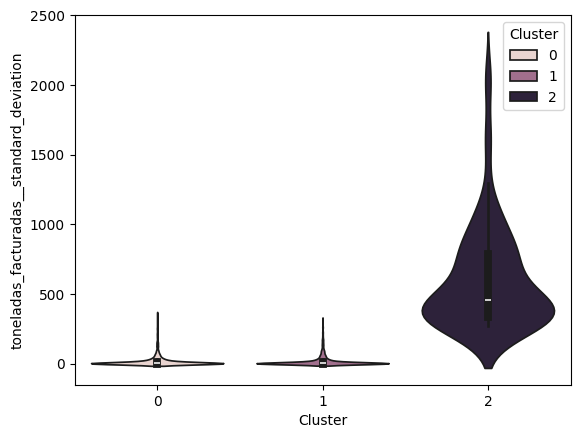

3. toneladas_facturadas__variation_coefficient 	  (F-score:4352.99)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,2.240505,0.654518,0.735870,1.802967,2.203543,2.607331,5.264821
1,3770.0,0.981985,0.383554,0.177704,0.679869,0.932513,1.245103,2.157052
2,87.0,0.945726,0.547853,0.319788,0.589194,0.796947,1.167109,3.838927


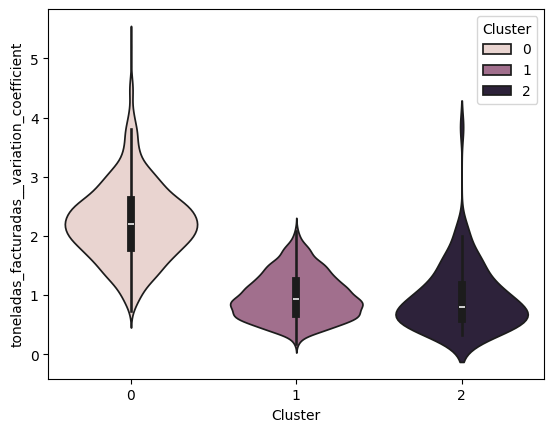

4. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_0 	  (F-score:3649.57)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,346.358115,934.869617,0.007000,5.77600,41.689000,246.288000,13163.60400
1,3770.0,822.101667,2066.867002,0.021816,21.75725,98.031865,548.506503,24468.13600
2,87.0,28802.639337,20987.860478,3132.010000,13220.25110,21021.670000,39271.339235,122904.54196


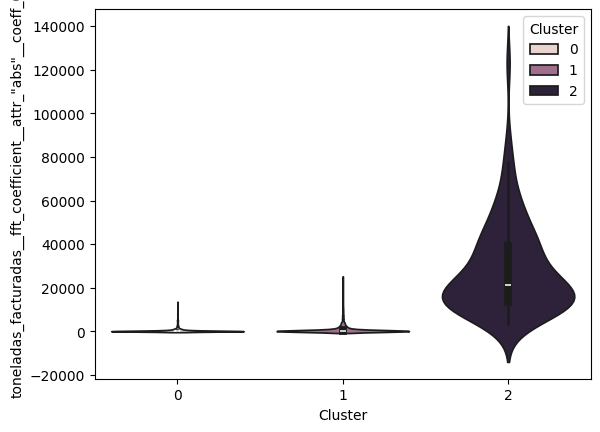

5. toneladas_facturadas__value_count__value_0 	  (F-score:3422.82)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,23.227208,7.322174,0.0,20.0,26.0,29.0,33.0
1,3770.0,6.993899,7.263798,0.0,1.0,4.0,12.0,28.0
2,87.0,4.850575,6.875181,0.0,0.0,1.0,7.5,23.0


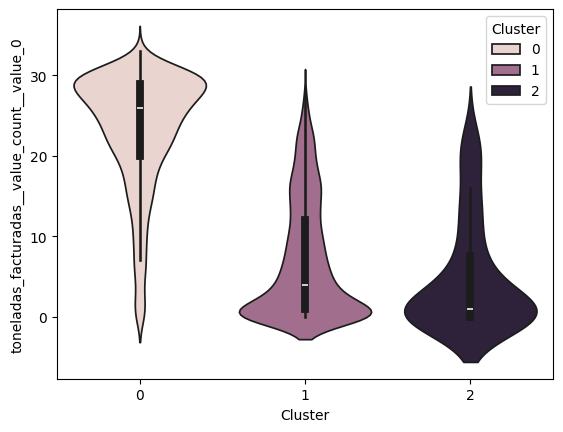

6. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_2 	  (F-score:3298.61)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,118.907729,295.076265,0.001984,1.960414,15.567762,99.058862,3271.725019
1,3770.0,100.417808,258.830182,0.001227,2.305853,11.440733,70.253393,4117.283194
2,87.0,4346.058613,3337.580831,449.971857,2050.824846,3165.540772,5796.317723,18717.396541


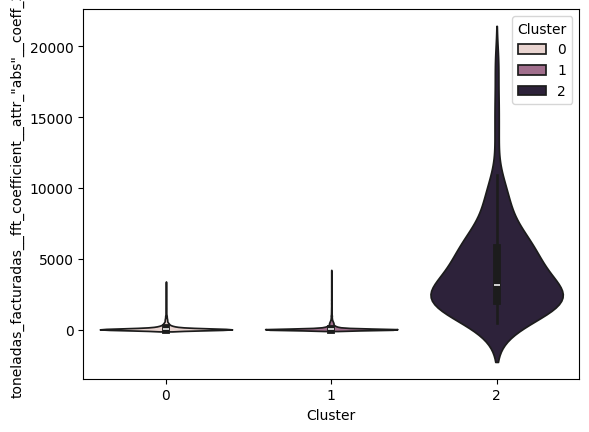

7. toneladas_facturadas__count_above_mean 	  (F-score:3259.44)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,8.422768,2.870111,1.0,6.0,8.0,10.0,19.0
1,3770.0,14.348011,2.601274,6.0,13.0,14.0,16.0,27.0
2,87.0,14.459770,3.506819,4.0,12.0,15.0,18.0,22.0


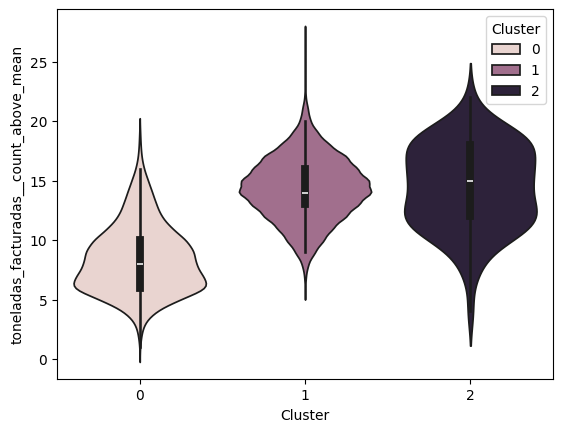

8. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_17 	  (F-score:3220.22)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,67.502812,156.631131,0.001485,1.531943,9.556634,55.069713,1810.025389
1,3770.0,84.508377,201.978166,0.001840,2.358333,10.917857,63.719218,2886.411150
2,87.0,2309.679772,1487.999313,175.529116,1333.831465,1886.156350,2922.796728,8785.829442


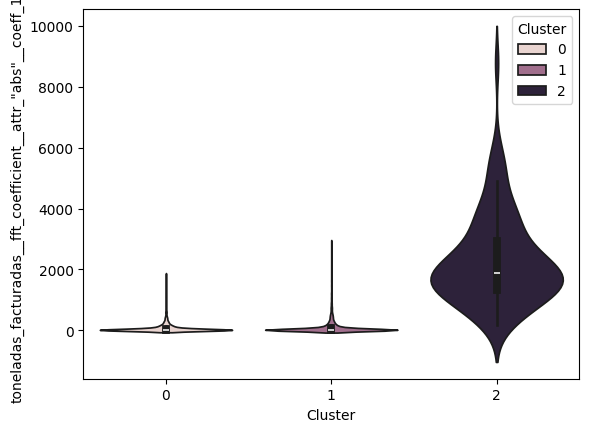

9. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_1 	  (F-score:3174.59)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,204.007318,557.622068,0.002279,2.806976,22.228423,147.712371,7549.051500
1,3770.0,154.014876,434.344740,0.001570,2.910557,15.339367,91.923032,4892.665828
2,87.0,7881.595407,6312.097196,1208.902033,3254.864846,6363.253564,11003.047005,32575.083703


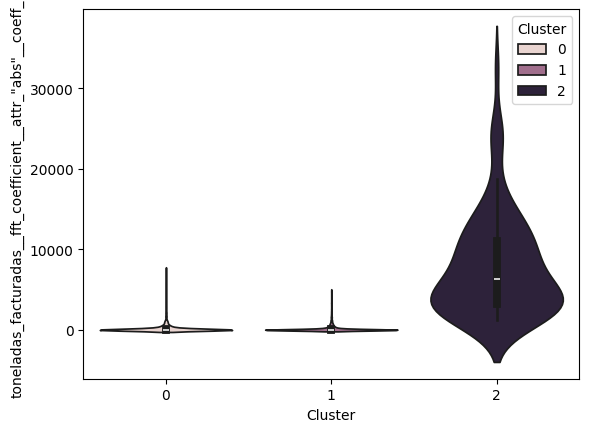

10. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_10 	  (F-score:2765.50)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,67.752320,151.080673,0.000798,1.444145,10.024031,60.290722,1552.962960
1,3770.0,83.353614,197.873989,0.000185,2.434682,10.721801,62.704258,2692.090559
2,87.0,2423.820002,1910.515807,76.950495,1229.170342,1958.859580,2924.833191,11879.944236


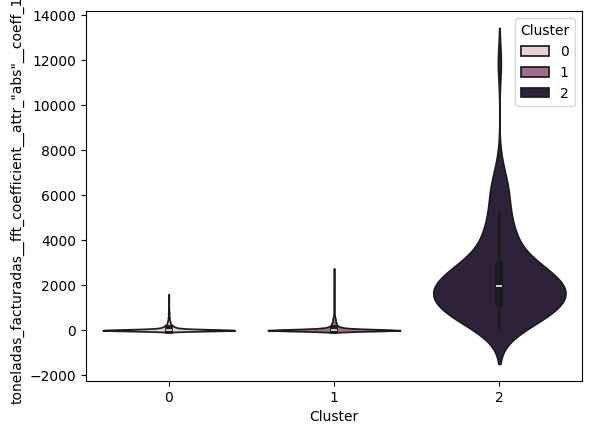

11. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_12 	  (F-score:2692.66)


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2117.0,70.335027,166.067782,0.002646,1.550441,9.672863,60.045303,2410.492667
1,3770.0,85.403645,202.183000,0.001000,2.603448,11.919053,64.624413,3195.648315
2,87.0,2478.529550,1973.017528,137.296440,1414.915588,2022.814721,3162.155491,14916.768609


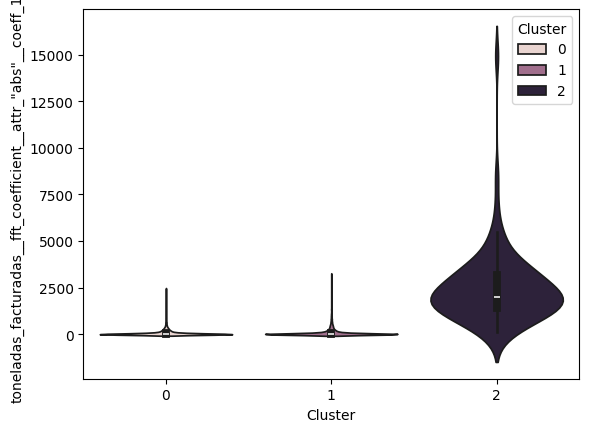

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Aplicar PCA con 4 componentes
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Método del codo para determinar el número óptimo de clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_components)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Selección de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.savefig("metodo_del_codo.png")

# Aplicar KMeans con 3 clusters como ejemplo
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_components)

# Agregar componentes PCA y etiquetas de cluster al DataFrame
X['PCA1'] = pca_components[:, 0]
X['PCA2'] = pca_components[:, 1]
X['PCA3'] = pca_components[:, 2]
X['Cluster'] = clusters

# Gráfico 3D de dispersión
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['PCA1'], X['PCA2'], X['PCA3'],
                     c=X['Cluster'], cmap='Set2', s=60)
ax.set_title('Análisis de Clustering 3D con PCA')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.savefig("clustering_3d.png")
plt.show()

from scipy.stats import f_oneway


# Evaluar importancia de variables usando ANOVA (F-test)
feature_scores = {}
for col in X.columns[:-4]:  # Excluir la columna de clúster
    groups = [group[col].values for name, group in X.groupby('Cluster')]
    f_stat, p_val = f_oneway(*groups)
    feature_scores[col] = f_stat

# Ordenar las variables por importancia (F-score descendente)
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Mostrar resultados
print("Ranking de variables más importantes para el clustering:")
for i, (feature, score) in enumerate(sorted_features[:11], 1):
    print(f"{i}. {feature} \t  (F-score:{score:.2f})")
    sns.violinplot(data = X, y = feature, x = "Cluster" , hue ="Cluster" )
    display(X.groupby("Cluster")[feature].describe())
    plt.show()

In [167]:
# Mostrar resultados
print("Ranking de variables más importantes para el clustering:")
for i, (feature, score) in enumerate(sorted_features[:11], 1):
    print(f"{i}. {feature} \t  (F-score:{score:.2f})")
    #sns.violinplot(data = X, y = feature, x = "Cluster" , hue ="Cluster" )
    #display(X.groupby("Cluster")[feature].describe())
    plt.show()

Ranking de variables más importantes para el clustering:
1. toneladas_facturadas__binned_entropy__max_bins_12 	  (F-score:4610.76)
2. toneladas_facturadas__standard_deviation 	  (F-score:4367.71)
3. toneladas_facturadas__variation_coefficient 	  (F-score:4352.99)
4. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_0 	  (F-score:3649.57)
5. toneladas_facturadas__value_count__value_0 	  (F-score:3422.82)
6. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_2 	  (F-score:3298.61)
7. toneladas_facturadas__count_above_mean 	  (F-score:3259.44)
8. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_17 	  (F-score:3220.22)
9. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_1 	  (F-score:3174.59)
10. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_10 	  (F-score:2765.50)
11. toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_12 	  (F-score:2692.66)


In [13]:
analisis1 = data[data.id.isin(X.index)].copy()

"""
analisis1["MAPE_PVO"] = np.where(
                        (analisis1.toneladas_facturadas < 1) & (analisis1.toneladas_pvo < 1), 0,
                        np.where(
                            ((analisis1.toneladas_facturadas < 1) & (analisis1.toneladas_pvo >= 1)) | ((analisis1.toneladas_facturadas >= 1) & (analisis1.toneladas_pvo < 1)), 1,
                            np.where(
                                (analisis1.toneladas_facturadas >= 1) & (analisis1.toneladas_pvo >= 1),
                                np.abs(analisis1.toneladas_facturadas - analisis1.toneladas_pvo) / np.where(analisis1.toneladas_pvo != 0, analisis1.toneladas_pvo, 1),  # Evita división por cero
                                0
                            )
                        )
                    )

"""
#analisis1["MAPE_PVO"] = np.minimum(analisis1["MAPE_PVO"],2)

analisis1 = analisis1[analisis1.mes_anio < date_tdy]

analisis1["Cluster"] = analisis1.id.map(X.Cluster.to_dict())

analisis1["mcc"] = np.where(analisis1.toneladas_facturadas> 0.001, 1, 0)

analisis1

,id,mes_anio,toneladas_facturadas,toneladas_deuda_libre,toneladas_deuda_mes_resto,toneladas_deuda_mes_siguiente,toneladas_plan_ventas,toneladas_pvo,MAPE_PVO,WMAPE_PVO,Cluster,mcc
478,"ACERÍA CELAYA_SKU_ALAMBRON 1/4"" CONST BYM C 1.4T",2022-08-01,482.7920,0.0,0.0,0.0,659.33000,308.91700,0.562853,271.741144,2,1
479,"ACERÍA CELAYA_SKU_ALAMBRON 1/4"" CONST BYM C 1.4T",2022-09-01,447.1160,0.0,0.0,0.0,340.85700,340.85700,0.311741,139.384255,2,1
480,"ACERÍA CELAYA_SKU_ALAMBRON 1/4"" CONST BYM C 1.4T",2022-10-01,295.9420,0.0,0.0,0.0,642.42000,642.42000,0.539333,159.611146,2,1
481,"ACERÍA CELAYA_SKU_ALAMBRON 1/4"" CONST BYM C 1.4T",2022-11-01,705.5210,0.0,0.0,0.0,768.70200,768.70200,0.082192,57.988040,2,1
482,"ACERÍA CELAYA_SKU_ALAMBRON 1/4"" CONST BYM C 1.4T",2022-12-01,776.8000,0.0,0.0,0.0,636.52300,636.52300,0.220380,171.191259,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
657798,"SC WRS LAFAYETTE LA_SKU_STEEL WIRE IPS 0.108"" ...",2025-02-01,0.0000,0.0,0.0,0.0,0.10762,0.10762,0.000000,NaN,0,0
657799,"SC WRS LAFAYETTE LA_SKU_STEEL WIRE IPS 0.108"" ...",2025-03-01,0.0000,0.0,0.0,0.0,0.10762,0.10762,0.000000,NaN,0,0
657800,"SC WRS LAFAYETTE LA_SKU_STEEL WIRE IPS 0.108"" ...",2025-05-01,0.7080,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0,1
657801,"SC WRS LAFAYETTE LA_SKU_STEEL WIRE IPS 0.108"" ...",2025-06-01,0.3535,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0,1


Gráfico guardado como 'kpi_cluster_grid_extended.png'


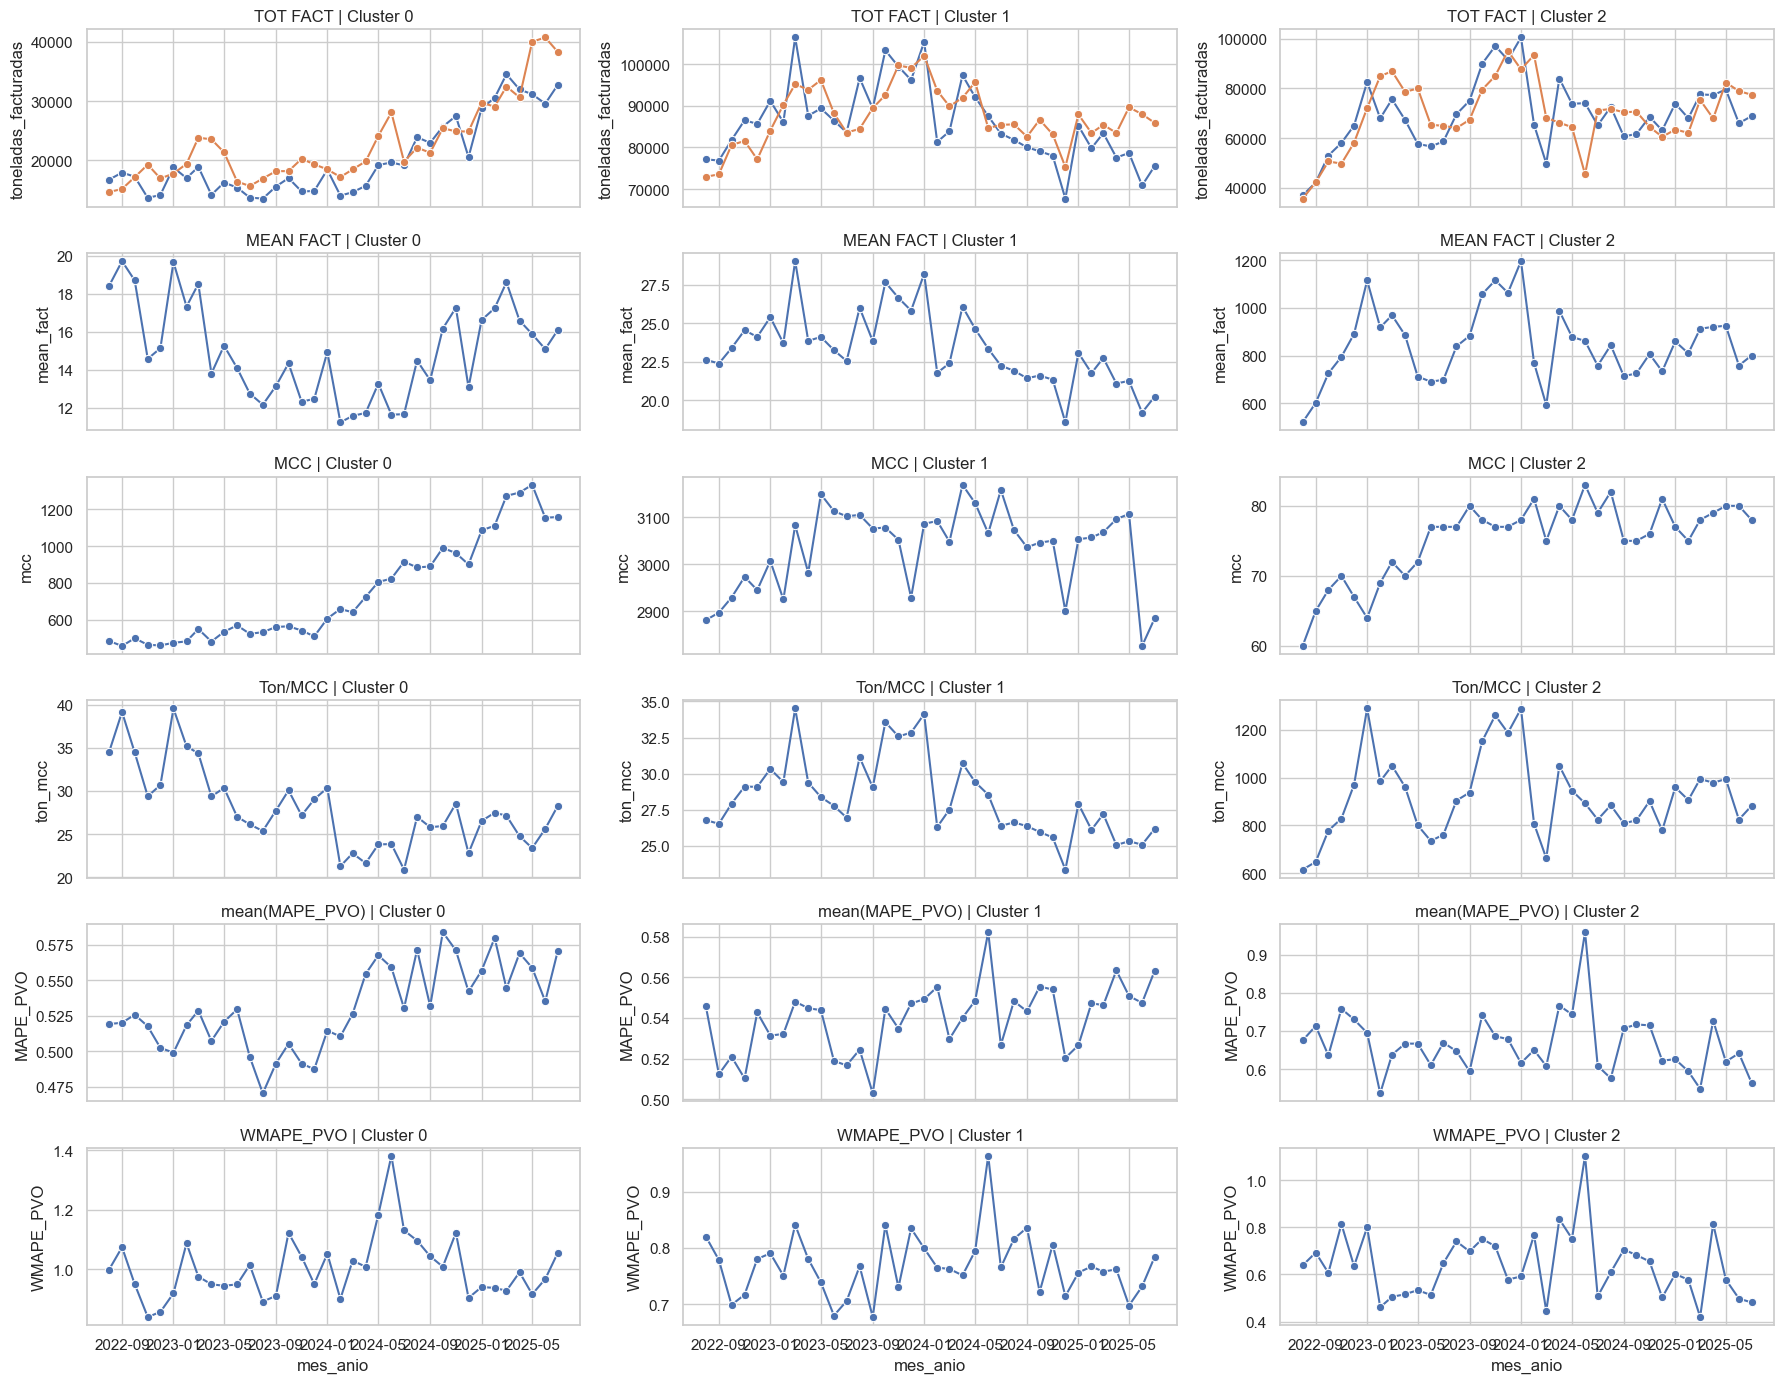

In [ ]:
tab_analisis = analisis1.groupby(["Cluster", "mes_anio"]).agg({"toneladas_facturadas": ["sum", "mean"], "toneladas_pvo":["sum", "mean"],"mcc":"sum", "MAPE_PVO" : "mean", "WMAPE_PVO" : "sum"}).reset_index()

tab_analisis.columns = ["Cluster", "mes_anio", "toneladas_facturadas", "mean_fact","pvo_tot","pvo_mean", "mcc", "MAPE_PVO", "WMAPE_PVO"] 

tab_analisis["WMAPE_PVO"] = tab_analisis["WMAPE_PVO"].div(tab_analisis["toneladas_facturadas"])  

tab_analisis["ton_mcc"] = tab_analisis.toneladas_facturadas.div(tab_analisis.mcc) 

# Crear figura con 3 filas (KPIs) y 3 columnas (Clusters)
fig, axes = plt.subplots(6, 3, figsize=(18, 14), sharex=True)

# KPIs y títulos
kpis = ["toneladas_facturadas","mean_fact", "mcc", "ton_mcc", "MAPE_PVO", "WMAPE_PVO"]

kpi_titles = ["TOT FACT" ,"MEAN FACT","MCC", "Ton/MCC", "mean(MAPE_PVO)", "WMAPE_PVO"]

# Graficar cada KPI por cluster
for i, kpi in enumerate(kpis):

    for j in range(3):
        cluster_data = tab_analisis[tab_analisis["Cluster"] == j]

        if kpi =="toneladas_facturadas":  
            sns.lineplot(ax=axes[i, j], data=cluster_data.fillna(0), x="mes_anio", y="toneladas_facturadas", marker="o")
            sns.lineplot(ax=axes[i, j], data=cluster_data.fillna(0), x="mes_anio", y="pvo_tot", marker="o")
        else :
            sns.lineplot(ax=axes[i, j], data=cluster_data, x="mes_anio", y=kpi, marker="o")

        axes[i, j].set_title(f"{kpi_titles[i]} | Cluster {j}")

plt.tight_layout()

plt.savefig("kpi_cluster_grid_extended.png")

print("Gráfico guardado como 'kpi_cluster_grid_extended.png'")


In [182]:
analisis1_full = analisis1[analisis1.mes_anio < date_tdy].merge(catalogo_id.drop_duplicates(subset = "id", keep = "first"), how = "left", on = "id", validate = "m:1")
pp_pl = analisis1_full.groupby(["mes_anio","Cluster","nom_ubicacion"]).toneladas_facturadas.sum().div(analisis1_full.groupby(["mes_anio","Cluster",]).toneladas_facturadas.sum())
pp_pl = pp_pl[pp_pl > 0.9]
#ax = pp_pl[pp_pl.index.get_level_values(1) == 0].unstack("nom_ubicacion").plot(kind = "bar", stacked=True, figsize= (10,15))
pp_pl

Series([], Name: toneladas_facturadas, dtype: float64)

In [183]:
ax = pp_pl[pp_pl.index.get_level_values(1) == 1].unstack("nom_ubicacion").plot(kind = "bar", stacked=True, figsize= (10,15))

TypeError: no numeric data to plot

In [176]:
ax = pp_pl[pp_pl.index.get_level_values(1) == 2].unstack("nom_ubicacion").plot(kind = "bar", stacked=True, figsize= (10,12))

KeyError: 'Level nom_ubicacion not found'

In [25]:
analisis1_full.nom_articulo_2

0                  ALAMBRON
1                  ALAMBRON
2                  ALAMBRON
3                  ALAMBRON
4                  ALAMBRON
                ...        
183963    MALLAS Y ALAMBRES
183964    MALLAS Y ALAMBRES
183965    MALLAS Y ALAMBRES
183966    MALLAS Y ALAMBRES
183967    MALLAS Y ALAMBRES
Name: NombreGrupoEstadistico1, Length: 183968, dtype: object

<Axes: xlabel='mes_anio,Cluster'>

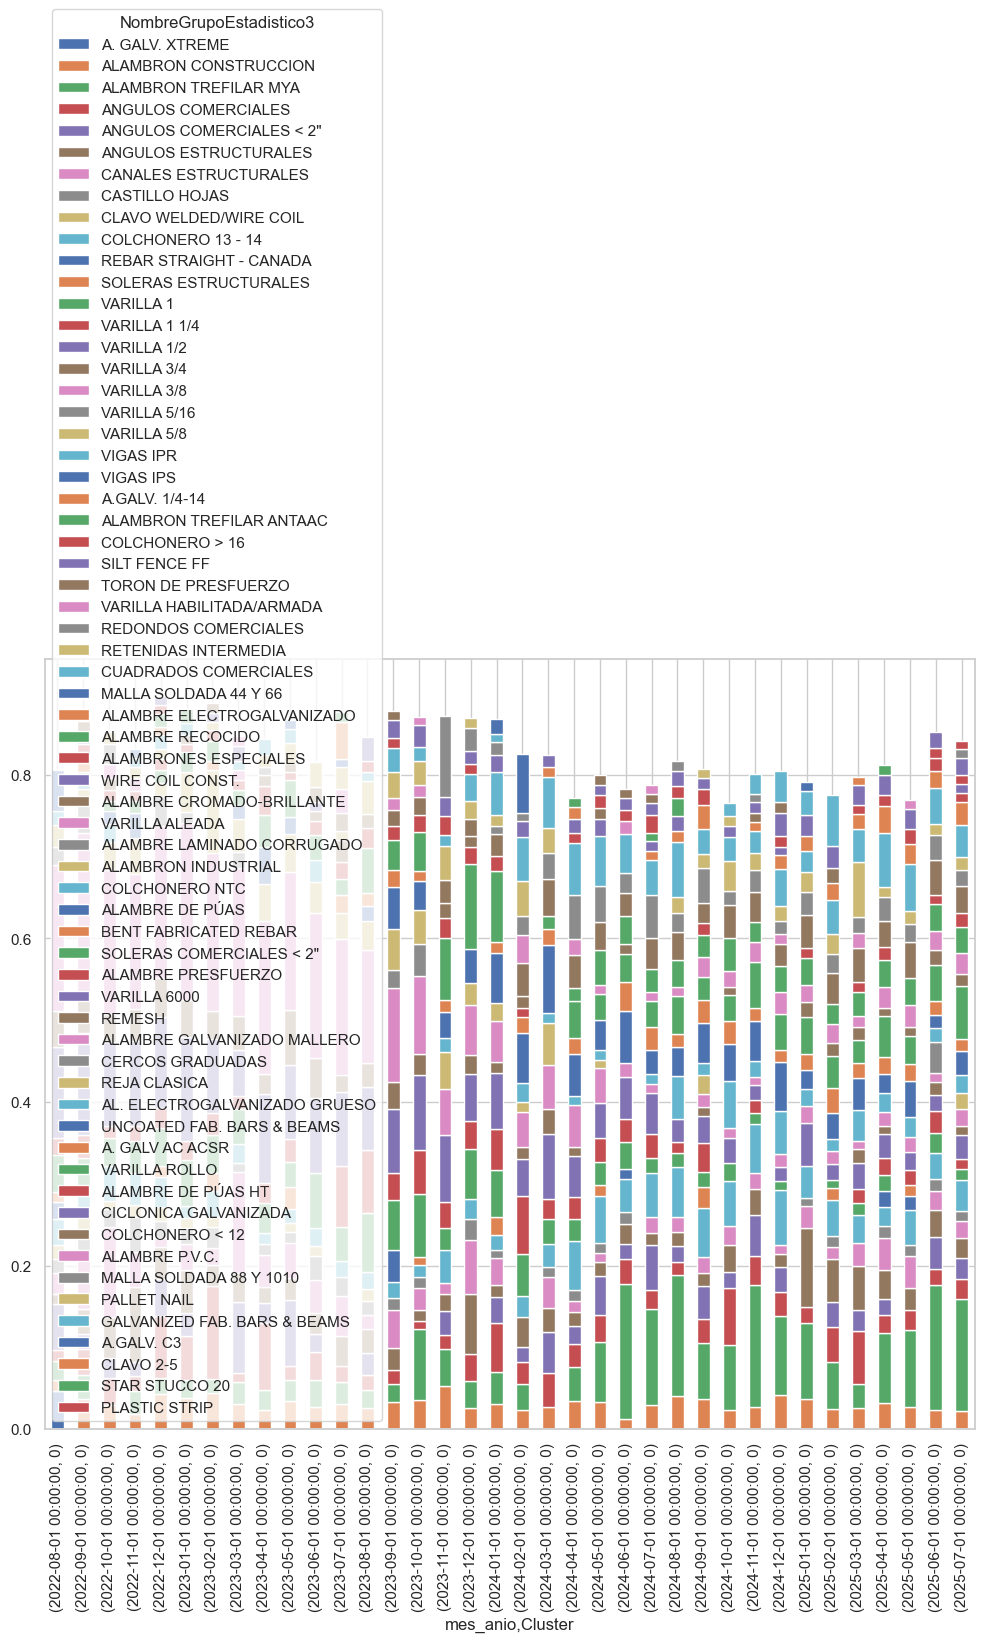

In [59]:
analisis1_full = analisis1[analisis1.mes_anio < date_tdy].merge(catalogo_id.drop_duplicates(subset = "id", keep = "first"), how = "left", on = "id", validate = "m:1")
pp_pl = analisis1_full.groupby(["mes_anio","Cluster","NombreGrupoEstadistico3"]).toneladas_facturadas.sum().div(analisis1_full.groupby(["mes_anio","Cluster",]).toneladas_facturadas.sum())
pp_pl = pp_pl[pp_pl > 0.01]
pp_pl[pp_pl.index.get_level_values(1) == 0].unstack("NombreGrupoEstadistico3").plot(kind = "bar", stacked=True, figsize= (12,10))

<Axes: xlabel='mes_anio,Cluster'>

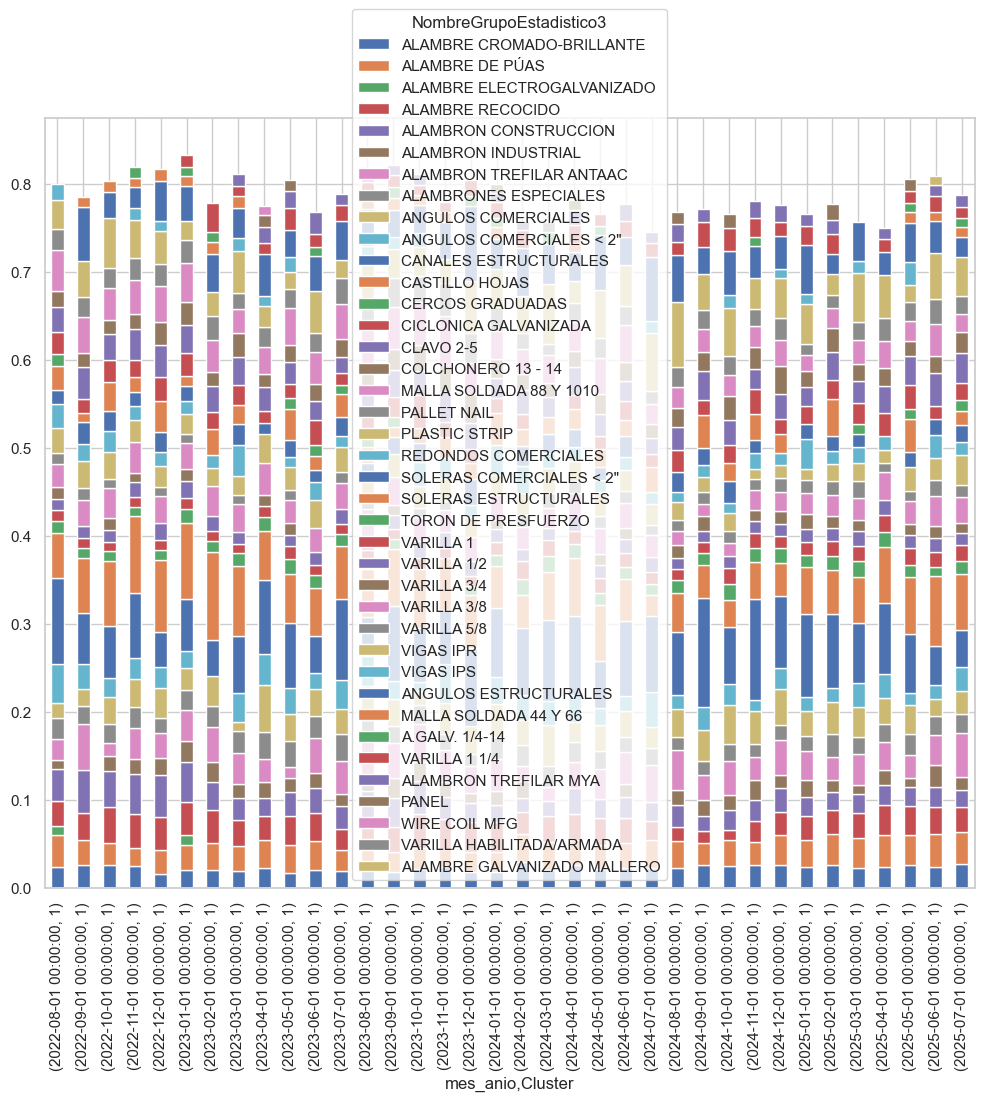

In [60]:
pp_pl[pp_pl.index.get_level_values(1) == 1].unstack("NombreGrupoEstadistico3").plot(kind = "bar", stacked=True, figsize= (12,10))

<Axes: xlabel='mes_anio,Cluster'>

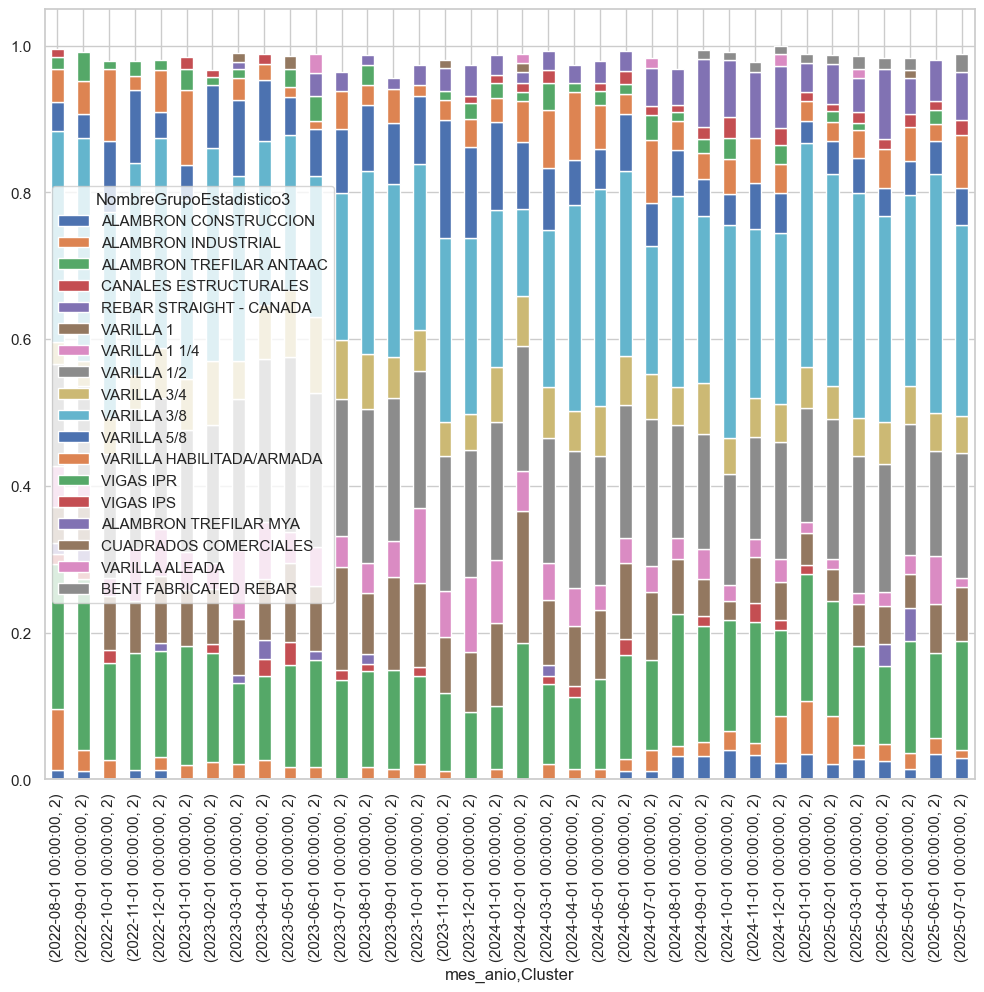

In [61]:
pp_pl[pp_pl.index.get_level_values(1) == 2].unstack("NombreGrupoEstadistico3").plot(kind = "bar", stacked=True, figsize= (12,10))

1476 537


C:\Users\adojeda\AppData\Local\Temp\ipykernel_58604\494089682.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos = X[X['toneladas_facturadas__linear_trend__attr_"pvalue"']<0.05][X['toneladas_facturadas__linear_trend__attr_"slope"']>0].iloc[:,X.columns.str.contains("trend")].index.values
C:\Users\adojeda\AppData\Local\Temp\ipykernel_58604\494089682.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg = X[X['toneladas_facturadas__linear_trend__attr_"pvalue"']<0.05][X['toneladas_facturadas__linear_trend__attr_"slope"']<0].iloc[:,X.columns.str.contains("trend")].index.values


<Axes: xlabel='mes_anio'>

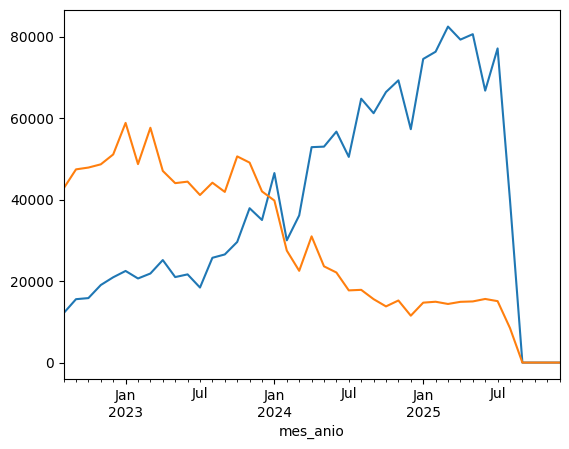

In [344]:
pos = X[X['toneladas_facturadas__linear_trend__attr_"pvalue"']<0.05][X['toneladas_facturadas__linear_trend__attr_"slope"']>0].iloc[:,X.columns.str.contains("trend")].index.values

neg = X[X['toneladas_facturadas__linear_trend__attr_"pvalue"']<0.05][X['toneladas_facturadas__linear_trend__attr_"slope"']<0].iloc[:,X.columns.str.contains("trend")].index.values

print(len(pos), len(neg))
data_[data_.id.isin(pos)].groupby("mes_anio").toneladas_facturadas.sum().plot()

data_[data_.id.isin(neg)].groupby("mes_anio").toneladas_facturadas.sum().plot()

5

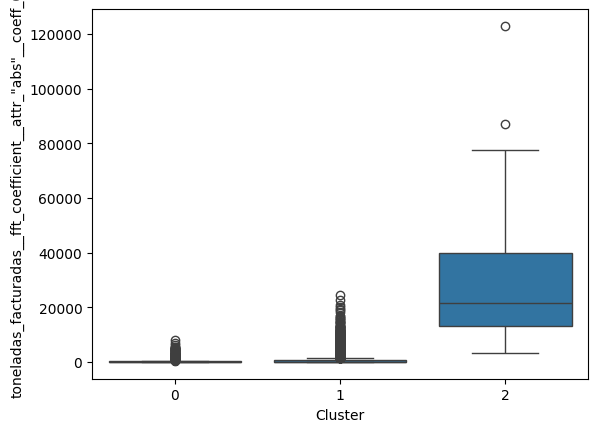

In [346]:
sns.boxplot(data = X, y = 'toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_0', x = "Cluster" )
i

<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_1'>

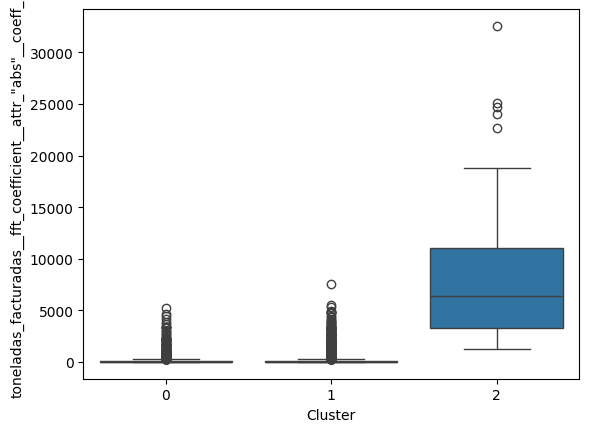

In [347]:
sns.boxplot(data = X, y = 'toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_1', x = "Cluster" )

<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_2'>

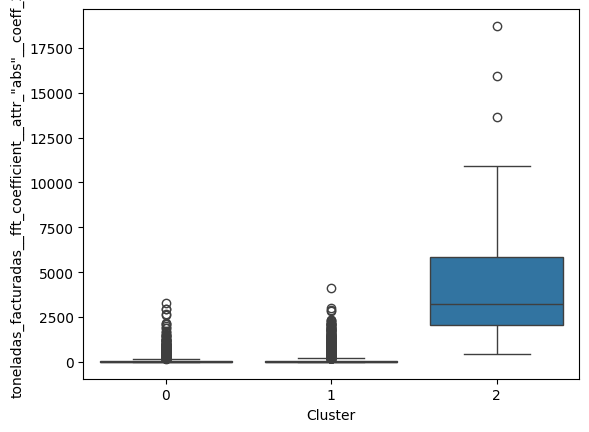

In [348]:
sns.boxplot(data = X, y = 'toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_2', x = "Cluster" )

<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__value_count__value_0'>

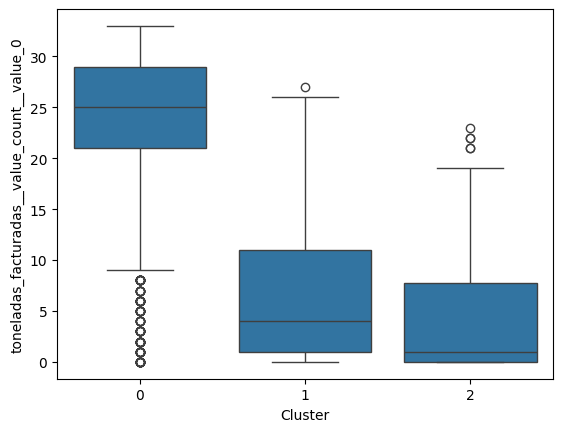

In [349]:


sns.boxplot(data = X, y = "toneladas_facturadas__value_count__value_0", x = "Cluster" )

<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__binned_entropy__max_bins_10'>

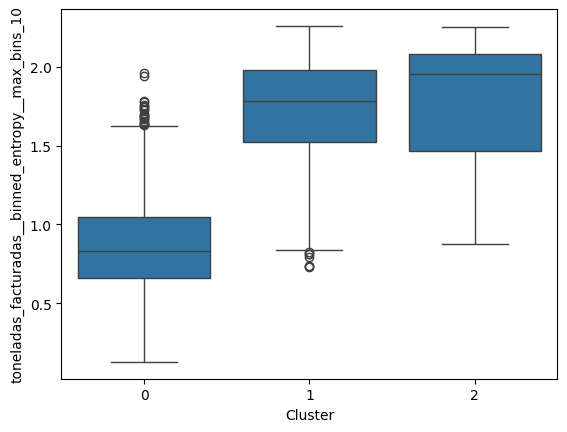

In [327]:
 
sns.boxplot(data = X, y = 'toneladas_facturadas__binned_entropy__max_bins_10', x = "Cluster" )

Cluster
1    3756
0    2163
2      55
Name: count, dtype: int64


<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__value_count__value_0'>

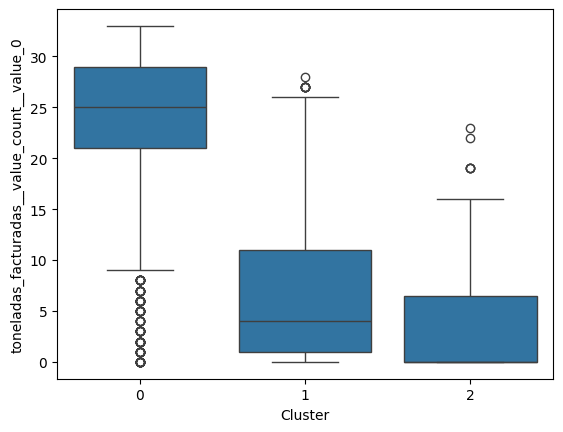

In [328]:
print(X.Cluster.value_counts())
sns.boxplot(data = X, y = "toneladas_facturadas__value_count__value_0", x = "Cluster" )

<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__skewness'>

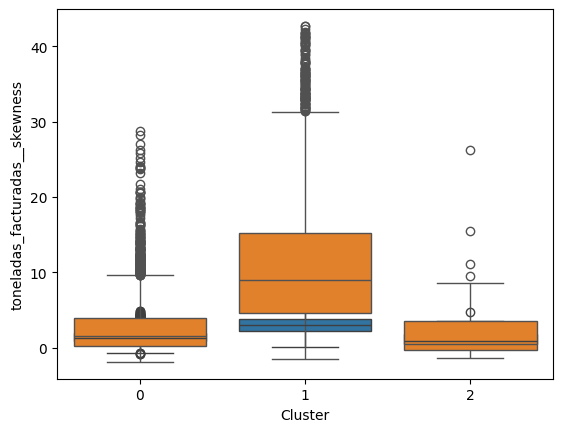

In [278]:
sns.boxplot(data = X, y = "toneladas_facturadas__skewness", x = "Cluster" )

sns.boxplot(data = X, y = "toneladas_facturadas__kurtosis", x = "Cluster" )

<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__variation_coefficient'>

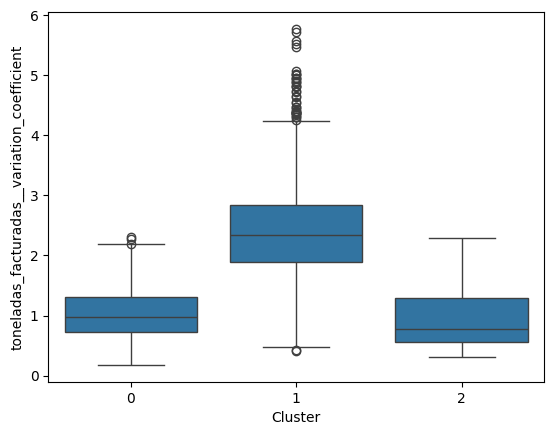

In [279]:
sns.boxplot(data = X, y = "toneladas_facturadas__variation_coefficient", x = "Cluster" )

<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__binned_entropy__max_bins_10'>

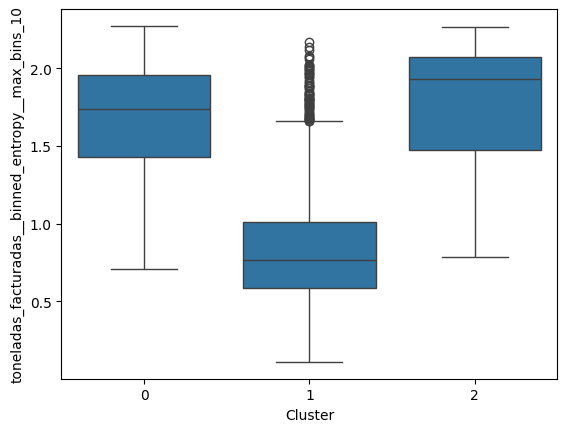

In [280]:
sns.boxplot(data = X, y = "toneladas_facturadas__binned_entropy__max_bins_10", x = "Cluster")

Cluster
0    3722
1    2248
2      68
Name: count, dtype: int64


<Axes: xlabel='Cluster', ylabel='toneladas_facturadas__count_above_mean'>

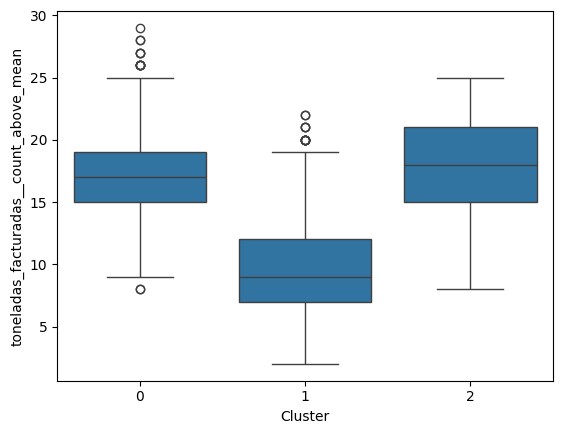

In [ ]:
print(X.Cluster.value_counts())
#sns.boxplot(data = X, y = "toneladas_facturadas__count_below_mean", x = "Cluster" )

sns.boxplot(data = X, y = "toneladas_facturadas__count_above_mean", x = "Cluster" )

Index(['toneladas_facturadas__linear_trend__attr_"pvalue"',
       'toneladas_facturadas__linear_trend__attr_"intercept"',
       'toneladas_facturadas__linear_trend__attr_"slope"',
       'toneladas_facturadas__autocorrelation__lag_0',
       'toneladas_facturadas__autocorrelation__lag_1',
       'toneladas_facturadas__autocorrelation__lag_2',
       'toneladas_facturadas__autocorrelation__lag_3',
       'toneladas_facturadas__autocorrelation__lag_4',
       'toneladas_facturadas__autocorrelation__lag_5',
       'toneladas_facturadas__autocorrelation__lag_6',
       'toneladas_facturadas__autocorrelation__lag_7',
       'toneladas_facturadas__autocorrelation__lag_8',
       'toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_0',
       'toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_1',
       'toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_2',
       'toneladas_facturadas__fft_coefficient__attr_"abs"__coeff_3',
       'toneladas_facturadas__fft_coefficient__

## Lectura y Transformación de datos

mes_anio                               0
NombreGrupo                            0
NombreDireccion                        0
NombreSubdireccion                     0
nom_familia_asociada                 608
nom_ubicacion                          0
NombreGrupoEstadistico1                0
NombreGrupoEstadistico2                0
NombreGrupoEstadistico3                0
NombreGrupoEstadistico4                0
nom_articulo                           0
toneladas_pvo                      61825
toneladas_plan_ventas              73816
toneladas_facturadas              636877
toneladas_deuda_libre            1036866
toneladas_deuda_mes_resto        1036866
toneladas_deuda_mes_siguiente    1036866
valid_ton                              0
dtype: int64

,toneladas_plan_ventas,toneladas_pvo,toneladas_facturadas,toneladas_deuda_libre,toneladas_deuda_mes_resto,toneladas_deuda_mes_siguiente,id,has_vol
mes_anio,,,,,,,,
2022-01-01,283980.9,287790.6,286584.9,0.0,0.0,0.0,16675,23077
2022-02-01,255772.6,259042.4,263344.1,0.0,0.0,0.0,17929,24985
2022-03-01,278838.6,271321.3,327628.7,0.0,0.0,0.0,16767,22928
2022-04-01,324571.2,318402.4,305476.7,0.0,0.0,0.0,17099,23359
2022-05-01,326033.9,341781.5,277615.7,0.0,0.0,0.0,17188,23525
2022-06-01,324390.3,330956.9,297976.6,0.0,0.0,0.0,17699,24395
2022-07-01,295152.3,292766.6,244992.0,0.0,0.0,0.0,17749,24211
2022-08-01,266936.2,256030.2,257475.4,0.0,0.0,0.0,17720,24394
2022-09-01,240372.2,242070.6,250522.5,0.0,0.0,0.0,17436,23732


<Axes: xlabel='mes_anio'>

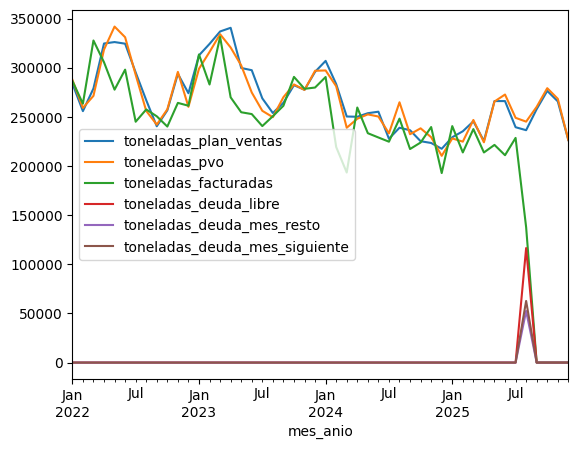

In [ ]:
data["id"] = data["nom_ubicacion"] + "_" + data["nom_articulo_2"]

data["has_vol"] = np.where(data.valid_ton.fillna(0) !=0 , True, False)

#data["id_to_consider"] = data.id.map(data[data.mes_anio == date_tdy].groupby("id").valid_ton.sum().fillna(0).apply(lambda x: True if x != 0 else False ).to_dict()).fillna(False)

#data["id_has_vol"] = data.id.map((data.groupby("id").toneladas_facturadas.sum() != 0).to_dict()).fillna(False) 

# eliminamos combinaciones sin volumen
#data = data[data["id_has_vol"]== True]

display(data.groupby("mes_anio").agg({"toneladas_plan_ventas":"sum", "toneladas_pvo" :"sum", "toneladas_facturadas":"sum", "toneladas_deuda_libre":"sum", "toneladas_deuda_mes_resto": "sum", "toneladas_deuda_mes_siguiente": "sum", "id":"nunique", "has_vol": "sum"}).round(1))

data.groupby("mes_anio").agg({"toneladas_plan_ventas":"sum", "toneladas_pvo" :"sum", "toneladas_facturadas":"sum", "toneladas_deuda_libre":"sum", "toneladas_deuda_mes_resto": "sum", "toneladas_deuda_mes_siguiente": "sum"}).plot()

## 1) Tiene algun tipo de Tonelaje asignado en el mes en curso

Existen 3 metricas de volumen
1) Metrica de facturación
2) Métrica de pronostico (PV, PVO & BP)
2) Métricas de Deuda (act, nxt, libre)

```
Tiene Fact|pron|deud
    NO: Fin (No generan alertas)
    Si: nxt
        Tiene pronostico
        NO:



```


Se procede a analizar los meses sin compra de cada una de las series temporales, se generará estadística al respecto
* se agrupará la data a nivel id,mes
* se etiquetarán aquellos ids que tengan algun tipo de volumen
* si no tiene volumen asignado (FACT, PV, PVO, DEUDA) se omiten los ids del pasado
* si tiene  (PV, PVO O BP) SE GENERAN ALERTAS
* si tiene deuda pero no fact o pronostico se genera alerta


In [675]:
print("cantidad de id's Historicos totales:", data.id.nunique())

date = pd.to_datetime("today").normalize().replace(day = 1) - pd.DateOffset(months=1)

msc = data.groupby(["mes_anio", "id"]).toneladas_facturadas.sum().reset_index()

# filtramos los ids que contengan volumen   
msc = msc[(msc.toneladas_facturadas > 0) & (msc.mes_anio < date)]

# etiquetamos clientes que tengan facturacion en los meses anteriores al ultimo mes cerrado
data["id_has_vol_past"] = np.where(data.id.isin(msc.id.unique()), True, False)

print("cantidad de id's Historicos totales:", data.groupby("id_has_vol_past").id.nunique())


msc = (date - msc.groupby("id").mes_anio.max()).dt.days.div(30).round().reset_index()

msc.rename(columns= {"mes_anio":"msc"}, inplace=True)

msc.msc = pd.cut(msc.msc, bins = [0, 1,2,3,4,5,6,8,10,12,np.inf], labels = [0, 1,2,3,4,5,6,8,10,12])

print("el 33.22 % de las combinacions de ubicacion y articulo tienen menos de 6 meses sin compra")

pd.concat([msc.msc.value_counts(normalize = True).sort_index().cumsum().mul(100).round(2) , msc.msc.value_counts().sort_index().cumsum().round(2)], axis = 1)

cantidad de id's Historicos totales: 60116
cantidad de id's Historicos totales: id_has_vol_past
False    24818
True     35298
Name: id, dtype: int64
el 33.22 % de las combinacions de ubicacion y articulo tienen menos de 6 meses sin compra


,proportion,count
msc,,
0,16.10,5684
1,22.55,7960
2,26.05,9194
3,28.89,10197
4,31.06,10962
5,33.22,11726
6,36.79,12985
8,40.39,14257
10,44.28,15631


In [683]:
# sin volumen en el pasado / mes actual
test = data[(data.id_has_vol_past == False) & (data.mes_anio == date_tdy)] #& (data.id_has_vol == True)]

print(test.id.nunique())

2784


In [551]:
print(msc[msc.msc >= 6].id.nunique())
comb_sc = data[data.id.isin(msc[msc.msc >= 6].id) & (data.mes_anio == pd.to_datetime("today").normalize().replace(day = 1))]
print(comb_sc.id.nunique())
comb_sc = comb_sc.groupby(["id"]).agg({"toneladas_facturadas":"sum", "toneladas_plan_ventas":"sum", "toneladas_deuda_mes_siguiente": "sum", "toneladas_deuda_libre": "sum", "toneladas_deuda_mes_resto": "sum"})
comb_sc["has_vol"] = np.where(comb_sc.toneladas_facturadas > 0, True, False)
comb_sc["has_pv"] = np.where(comb_sc.toneladas_plan_ventas > 0, True, False)
comb_sc["has_deuda_nxt"] = np.where(comb_sc.toneladas_deuda_mes_siguiente > 0, True, False)
comb_sc["has_deuda_act"] = np.where(comb_sc.toneladas_deuda_mes_resto > 0, True, False)
comb_sc["has_deuda_lib"] = np.where(comb_sc.toneladas_deuda_libre > 0, True, False)
comb_sc.groupby("has_vol").sum()

23572
2545


,toneladas_facturadas,toneladas_plan_ventas,toneladas_deuda_mes_siguiente,toneladas_deuda_libre,toneladas_deuda_mes_resto,has_pv,has_deuda_nxt,has_deuda_act,has_deuda_lib
has_vol,,,,,,,,,
False,-22.965821,9755.43462,3223.879543,8220.038459,389.538952,1744,62,41,546
True,2839.860143,261.15499,677.898168,866.598298,744.510290,30,33,10,53


In [555]:
comb_sc["sum_t"] =comb_sc.has_vol + comb_sc.has_pv+ comb_sc.has_deuda_act +comb_sc.has_deuda_nxt
comb_sc["sum_t"].value_counts()

comb_sc[comb_sc.sum_t == False].sort_values(by = "toneladas_deuda_libre", ascending= False).head(20)
data[data.id == comb_sc[comb_sc.sum_t == False].sort_values(by = "toneladas_deuda_libre", ascending= False).index[0]]

,mes_anio,NombreGrupo,NombreDireccion,NombreSubdireccion,nom_familia_asociada,nom_ubicacion,NombreGrupoEstadistico1,NombreGrupoEstadistico2,NombreGrupoEstadistico3,NombreGrupoEstadistico4,nom_articulo,toneladas_pvo,toneladas_plan_ventas,toneladas_facturadas,toneladas_deuda_libre,toneladas_deuda_mes_resto,toneladas_deuda_mes_siguiente,valid_ton,nom_articulo_2,id
379157,2023-05-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",NaN,NaN,513.334,NaN,NaN,NaN,513.33400,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
400728,2023-06-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",NaN,NaN,522.979,NaN,NaN,NaN,522.97900,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
422903,2023-07-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",375.91727,375.91727,160.780,NaN,NaN,NaN,912.61454,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
444995,2023-08-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",429.80275,429.80275,NaN,NaN,NaN,NaN,859.60550,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
467222,2023-09-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",317.06994,317.06994,NaN,NaN,NaN,NaN,634.13988,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
489604,2023-10-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",194.24527,194.24527,NaN,NaN,NaN,NaN,388.49054,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
511381,2023-11-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",185.60933,185.60933,4.013,NaN,NaN,NaN,375.23166,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
532597,2023-12-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",192.61783,192.61783,NaN,NaN,NaN,NaN,385.23566,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
553758,2024-01-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",136.90122,136.90122,NaN,NaN,NaN,NaN,273.80244,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."
575102,2024-02-01,ACEROS,ACEROS MEXICO,PERFILES NACIONAL,(237) CANAL,ACERÍA RAMOS ARIZPE,PERFILES,PERFILES ESTRUCTURALES,CANALES ESTRUCTURALES,"CANALES 4""","CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDUSTRIAL",21.71537,21.71537,59.757,NaN,NaN,NaN,103.18774,"SKU_CANAL 4"" X 4.5 A36/529-50 11.94M 4.0T INDU...","ACERÍA RAMOS ARIZPE_SKU_CANAL 4"" X 4.5 A36/529..."


In [ ]:
display(pd.crosstab(comb_sc.has_vol,comb_sc.has_pv ))  
display(pd.crosstab(comb_sc.has_vol,comb_sc.has_deuda ))
display(pd.crosstab(comb_sc.has_pv,comb_sc.has_deuda ))

has_pv,False,True
has_vol,,
False,593,1744
True,178,30


has_deuda,False,True
has_vol,,
False,2275,62
True,175,33


has_deuda,False,True
has_pv,,
False,688,83
True,1762,12


In [411]:
# Palanquilla
data[data.NombreGrupoEstadistico1.str.contains("PALANQUILLA")].groupby("mes_anio").agg({"toneladas_facturadas":"sum"}).round(1)

# PERFILES
data[data.NombreGrupoEstadistico1.str.contains("PERFILES")].groupby(["nom_familia_asociada", "mes_anio"]).toneladas_facturadas.sum().unstack(0)#.value_counts()#.plot(kind="barh", title="Perfiles por grupo estadístico")

#SOLUCIONES
data[data.NombreGrupoEstadistico1.str.contains("PERFILES")].groupby(["nom_familia_asociada", "NombreGrupoEstadistico3"]).toneladas_facturadas.sum().unstack(0)#.plot()#.value_counts()#.plot(kind="barh", title="Perfiles por grupo estadístico")

# VARILLA
data[data.NombreGrupoEstadistico1.str.contains("VARILLA")].groupby(["nom_familia_asociada", "NombreGrupoEstadistico3"]).toneladas_facturadas.sum().unstack(0)#.plot()#.value_counts()#.plot(kind="barh", title="Perfiles por grupo estadístico")

#ALAMBRON
data[data.NombreGrupoEstadistico1.str.contains("ALAMBRON")].groupby(["nom_familia_asociada", "NombreGrupoEstadistico4"]).toneladas_facturadas.sum().unstack(0)#.plot()#.value_counts()#.plot(kind="barh", title="Perfiles por grupo estadístico")


nom_familia_asociada,(102) ALAMBRE NEGRO ALTO CARBONO,(268 - 12583) ALAMBRON DECAPADO SINERGIAS,(423) ALAMBRON ENDEREZADO,(498) SUMINISTRO DIRECTO ITK,(55) ALAMBRON,(56) ALAMBRON CON TRATAMIENTO,(94) INT. ALAMBRON
NombreGrupoEstadistico4,,,,,,,
ALAMBRON CONSTRUCCION,NaN,NaN,NaN,408.88,200466.263140,NaN,NaN
ALAMBRON ELECTRODO,NaN,NaN,NaN,NaN,50260.610260,NaN,NaN
ALAMBRON MICROWIRE,NaN,NaN,NaN,NaN,53698.758960,NaN,NaN
ALAMBRON TREFILAR ANTAAC,NaN,NaN,NaN,NaN,680625.662500,NaN,NaN
ALAMBRON TREFILAR MYA,NaN,14.0,NaN,NaN,368971.961869,25.553,912.410
ALAMBRÓN ENDEREZADO,NaN,NaN,0.0,NaN,NaN,NaN,NaN
ALAMBRÓN INDUSTRIAL ALTOCARBÓN,NaN,NaN,NaN,NaN,48419.230650,NaN,NaN
ALAMBRÓN INDUSTRIAL BAJOCARBÓN,2.75,NaN,NaN,NaN,225460.407295,NaN,2451.228


Participación de volumen por ubicación
Cantidad de PL con volumen: 172


<Axes: title={'center': '% de Toneladas Facturadas por Ubicación'}, ylabel='nom_ubicacion'>

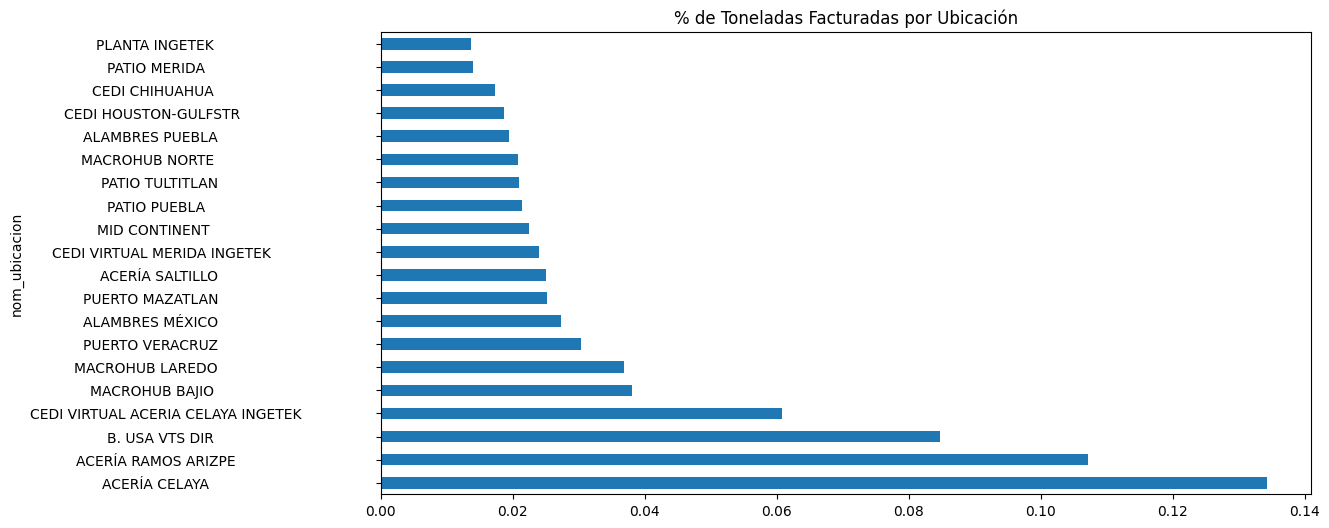

In [45]:
print("Participación de volumen por ubicación")

print("Cantidad de PL con volumen: {}".format(data.nom_ubicacion.nunique()))

data.groupby("nom_ubicacion").toneladas_facturadas.sum().div(data.toneladas_facturadas.sum()).sort_values(ascending=False).head(20).plot(kind='barh', figsize=(12, 6), title='% de Toneladas Facturadas por Ubicación')


total de combinaciones de PL & SKU :36015

total de combinaciones con más de 5 registros: 13716, 38.08%, que corresponden al 91.35% del volumen


<Axes: title={'center': 'Porcentaje Volumen pronosticable por mes'}, xlabel='mes_anio'>

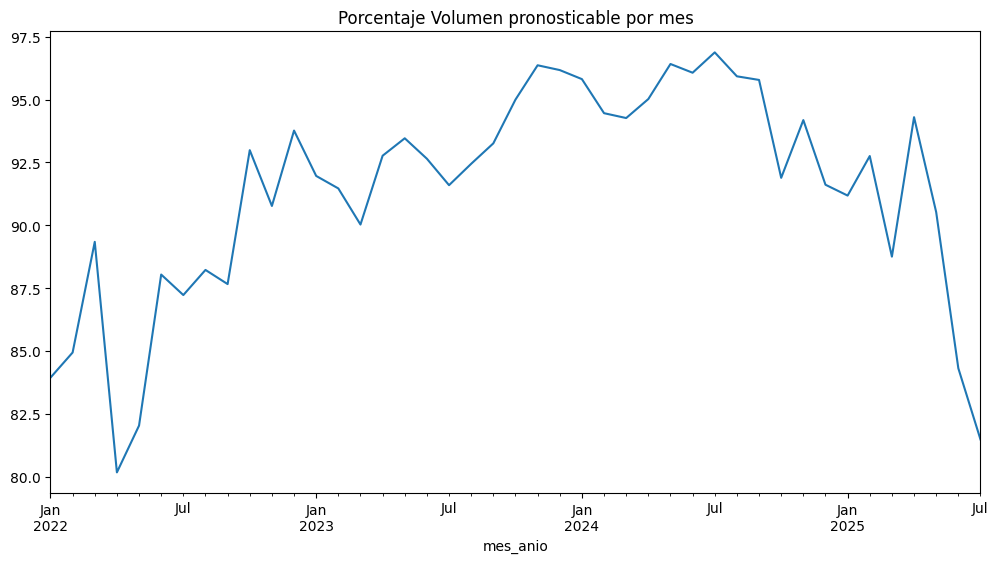

In [413]:
import pandas as pd

# Cargar tus datos
df = data.groupby(["mes_anio", "id"]).toneladas_facturadas.sum().reset_index()  # Asegúrate de tener las columnas: id, mes_anio, toneladas_facturadas

df = df[df['toneladas_facturadas'] > 0]  # Filtrar solo las filas con toneladas_facturadas > 0

comb_tot = df.id.nunique()

print("total de combinaciones de PL & SKU :{}".format(comb_tot))

# Convertir mes_anio a formato de fecha
df['mes_anio'] = pd.to_datetime(df['mes_anio'], format='%Y-%m')

df = df.loc[df["mes_anio"] < pd.to_datetime('2025-08-01'), :]  # Filtrar por fecha si es necesario

# Crear todas las combinaciones posibles de id y mes_anio
ids = df['id'].unique()
meses = pd.date_range(start=df['mes_anio'].min(), end=df['mes_anio'].max(), freq='MS')
combinaciones = pd.MultiIndex.from_product([ids, meses], names=['id', 'mes_anio'])

# Reindexar y rellenar con 0 donde no haya facturación
df_completo = df.set_index(['id', 'mes_anio']).reindex(combinaciones, fill_value=0).reset_index()

#conteo de datos
filtrar_datos = df_completo[df_completo.toneladas_facturadas > 0].groupby("id").toneladas_facturadas.count()

# etiquetamos aquellos que tengan almenos 6 observacionees de datos
filtrar_datos = filtrar_datos[filtrar_datos >= 6].index.tolist()

# etiquetado aquellos que tengan al menos 6 observaciones de datos
df_completo["has_more_than_5"] = np.where(df_completo["id"].isin(filtrar_datos), True, False)

comb = df_completo[df_completo.has_more_than_5 ==True].id.nunique()

print()
vol_div = df_completo.groupby(["mes_anio", "has_more_than_5"]).toneladas_facturadas.sum().unstack(-1)
vol_div["tot"] = vol_div.sum(axis=1)
vol_div["ppt"] = vol_div[True].div(vol_div["tot"], axis=0) * 100

print("total de combinaciones con más de 5 registros: {}, {}%, que corresponden al {}% del volumen".format(comb, round((comb/comb_tot)*100,2), round(vol_div["ppt"].mean(),2))) 

vol_div.ppt.plot(figsize=(12, 6), title='Porcentaje Volumen pronosticable por mes')

In [ ]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters 

extraction_settings = ComprehensiveFCParameters()

X = extract_features(df_completo[(df_completo.has_more_than_5 == True) & (df_completo.id != "ACERÍA CELAYA_G1_PALANQUILLA")].iloc[:,:3], 
                     column_id='id', 
                     column_sort='mes_anio',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

Feature Extraction: 100%|██████████| 20/20 [07:13<00:00, 21.66s/it]


In [415]:
X.loc[:,X.columns.str.contains("dickey")]

,"toneladas_facturadas__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""","toneladas_facturadas__augmented_dickey_fuller__attr_""pvalue""__autolag_""AIC""","toneladas_facturadas__augmented_dickey_fuller__attr_""usedlag""__autolag_""AIC"""
"3PL COATZACOALCOS_SKU_ALAMBRON 1/4"" CONST BYM C 1.4T",-3.932504,1.808243e-03,0.0
3PL COATZACOALCOS_SKU_ALAMBRON 5.8MM 1004 TURIA,-1.426024,5.697383e-01,5.0
3PL COATZACOALCOS_SKU_ALAMBRON 6.5MM 1008 BCO TURIA,-2.723987,6.997864e-02,0.0
3PL COATZACOALCOS_SKU_ALAMBRON 6.5MM 1015 VAR TURIA,-2.056138,2.625134e-01,0.0
"3PL COATZACOALCOS_SKU_VARILLA DA- 506 G42 C1 1"" 12.0 M P05 R",-5.513578,1.947490e-06,0.0
...,...,...,...
"WEST MEMPHIS DC._SKU_ANGLE 4"" X 4"" X 3/8"" A36/529-50 CU 40' 4.0T",-4.123561,8.852274e-04,0.0
"WEST MEMPHIS DC._SKU_ANGLE 4"" X 4"" X 5/16"" A36/529-50 20' 2.0T",-4.915530,3.252649e-05,0.0
"WEST MEMPHIS DC._SKU_CHANNEL 10"" X 15.3 A36/A572-50 40' 4.0T",-5.181215,9.602604e-06,0.0
"WEST MEMPHIS DC._SKU_CHANNEL 6"" X 8.2 A36/A572-50 40' 4.0T *MA*",-5.713522,7.208139e-07,0.0


In [416]:
X.loc[X['toneladas_facturadas__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"']< 0.05, 'toneladas_facturadas__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC"' ].value_counts()

toneladas_facturadas__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC"
0.0     7266
1.0      978
10.0     353
2.0      220
3.0      160
9.0      141
7.0       83
5.0       72
8.0       69
4.0       63
6.0       49
Name: count, dtype: int64

<Axes: xlabel='zeros_pp', ylabel='toneladas_facturadas'>

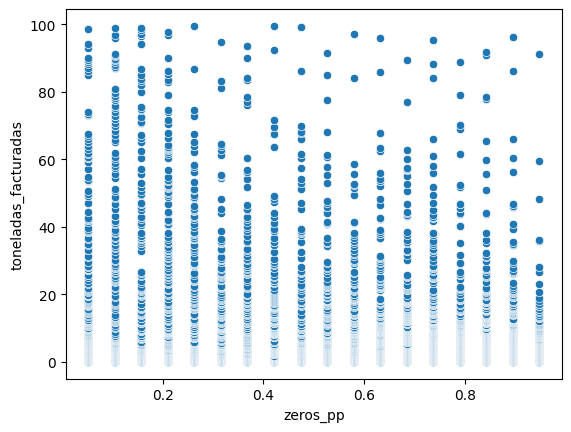

In [ ]:
df_completo["is_zero"] = np.where(df_completo.toneladas_facturadas == 0, True, False)
# Filtrar los datos que tienen más de 5 observaciones y contienen "PALANQUILLA" en el id

mean_df = df_completo.groupby("id").toneladas_facturadas.mean().reset_index()

count_zeros = df_completo.groupby(["id"]).is_zero.value_counts().unstack()

count_zeros["zeros_pp"] =  count_zeros[True] / (count_zeros[False] + count_zeros[True])

count_zeros = count_zeros.merge(mean_df, on="id", how="left")#.rename(columns={True: "count_zeros", False: "count_non_zeros"}).sort_values(by="count_zeros", ascending=False, inplace=True)
#count_zeros.plot()

import seaborn as sns

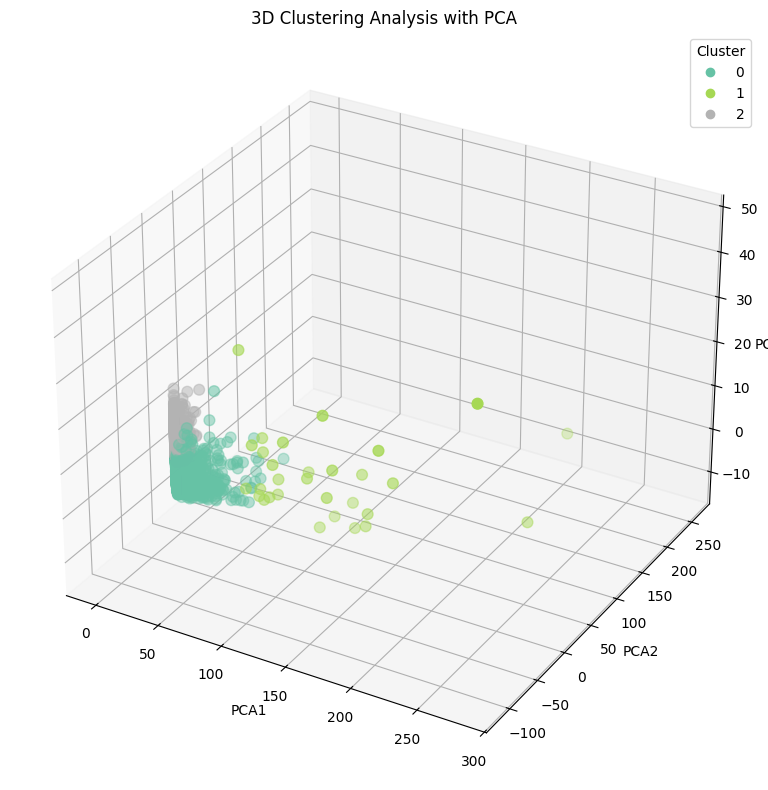

In [347]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply PCA with 3 components
pca = PCA(n_components=4)
pca_components = pca.fit_transform(scaled_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_components)

# Add PCA components and cluster labels to the DataFrame
X['PCA1'] = pca_components[:, 0]
X['PCA2'] = pca_components[:, 1]
X['PCA3'] = pca_components[:, 2]
X['Cluster'] = clusters
# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['PCA1'], X['PCA2'], X['PCA3'],
                     c=X['Cluster'], cmap='Set2', s=60)
ax.set_title('3D Clustering Analysis with PCA')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

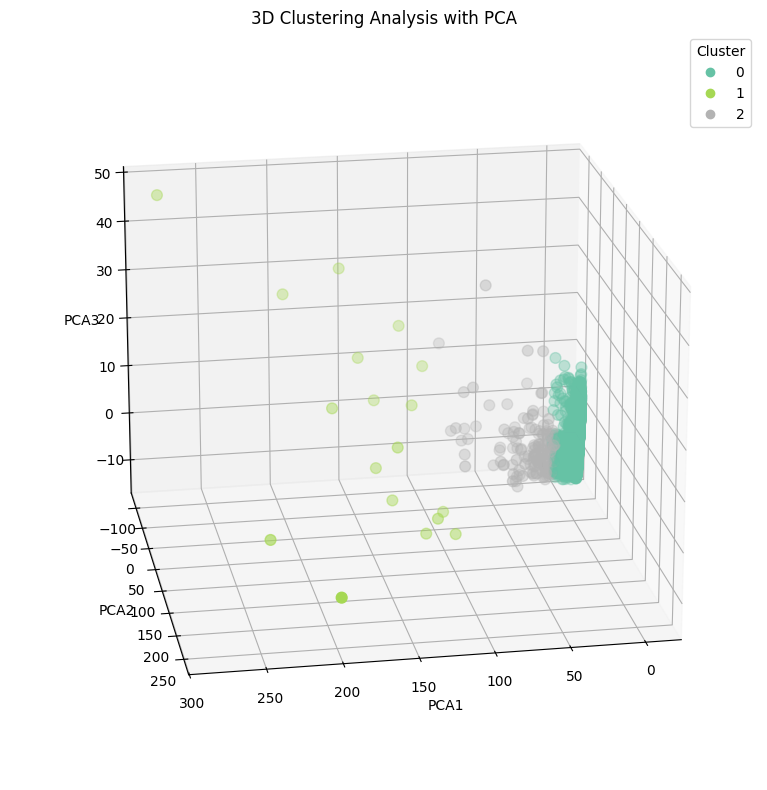

In [346]:
# 3D Scatter plot with custom view angle
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['PCA1'], X['PCA2'], X['PCA3'],
                     c=X['Cluster'], cmap='Set2', s=60)

# Set custom view angle
ax.view_init(elev=20, azim=80)  # Adjust these values as needed

ax.set_title('3D Clustering Analysis with PCA')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()


In [342]:
df_completo[(df_completo.has_more_than_5 == True) & (df_completo.id.str.contains("PALANQUILLA"))]

,id,mes_anio,toneladas_facturadas,has_more_than_5
252605,ACERÍA CELAYA_G1_PALANQUILLA,2024-01-01,0.00,True
252606,ACERÍA CELAYA_G1_PALANQUILLA,2024-02-01,0.00,True
252607,ACERÍA CELAYA_G1_PALANQUILLA,2024-03-01,0.00,True
252608,ACERÍA CELAYA_G1_PALANQUILLA,2024-04-01,0.00,True
252609,ACERÍA CELAYA_G1_PALANQUILLA,2024-05-01,0.00,True
252610,ACERÍA CELAYA_G1_PALANQUILLA,2024-06-01,5599.88,True
252611,ACERÍA CELAYA_G1_PALANQUILLA,2024-07-01,13516.12,True
252612,ACERÍA CELAYA_G1_PALANQUILLA,2024-08-01,25996.82,True
252613,ACERÍA CELAYA_G1_PALANQUILLA,2024-09-01,19350.80,True
252614,ACERÍA CELAYA_G1_PALANQUILLA,2024-10-01,15228.25,True


In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

<Axes: title={'center': 'Toneladas Facturadas GE3'}, xlabel='mes_anio'>

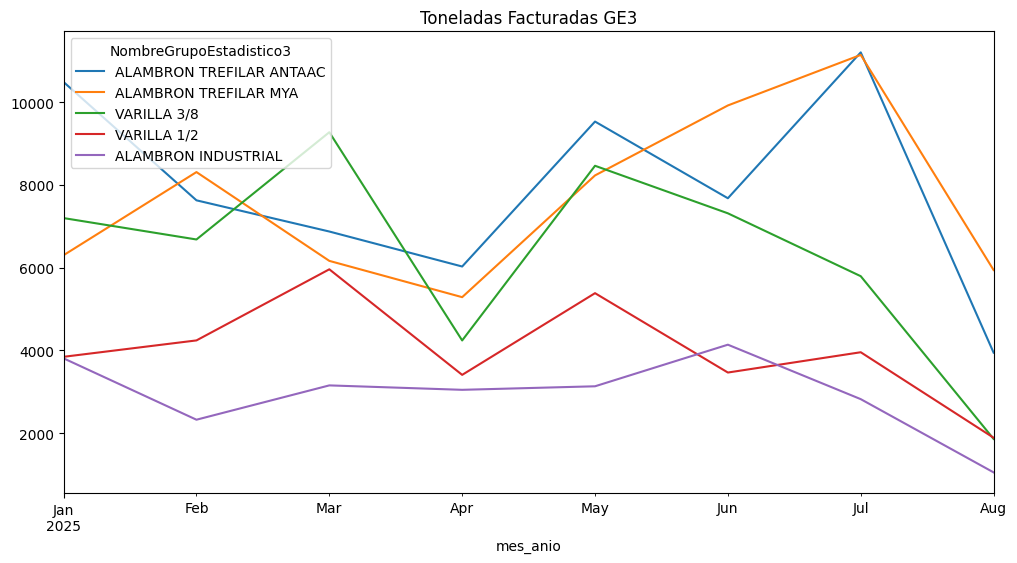

In [79]:
sorted_cols = data[(data.nom_ubicacion == "ACERÍA CELAYA") & (data.toneladas_facturadas > 0.001)].groupby("NombreGrupoEstadistico3").agg({"toneladas_facturadas":"sum"}).sort_values(ascending=False, by = "toneladas_facturadas")
sorted_cols.index
data[(data.nom_ubicacion == "ACERÍA CELAYA") & (data.toneladas_facturadas > 0.001)].groupby(["mes_anio", "NombreGrupoEstadistico3"]).toneladas_facturadas.sum().unstack(-1)[sorted_cols.index[:5]].plot(figsize=(12, 6), title='Toneladas Facturadas GE3')

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import hashlib
from datetime import datetime


# ------------------------------------------------------
date = datetime.now().date()
# ------------------------------------------------------
m, y = date.month, date.year
# ------------------------------------------------------
min_date = date.replace(year= y-1, month = m, day = 1)

min_date_2 = date.replace(year= y-2, month = m, day = 1)

max_date = date.replace( month = m-1, day = 1)

actual_date = date.replace(day = 1)

min_date, max_date, actual_date

(datetime.date(2024, 8, 1),
 datetime.date(2025, 7, 1),
 datetime.date(2025, 8, 1))

In [3]:
var= "toneladas_plan_ventas"

var2del = "toneladas_pvo"

pvo = pd.read_csv(r".\consultas\pvo.csv", engine="pyarrow")

pvo.nom_familia_asociada = pvo.nom_familia_asociada.str.replace(r'\s+|\t+', ' ', regex=True)

pvo.nom_ubicacion = pvo.nom_ubicacion.str.replace(r'\s+|\t+', ' ', regex=True)

pvo["Base"] = "pvo"

pvo = pvo.drop(columns= ["toneladas_dim_capacidades", var2del]) #"toneladas_pvo"

print(pvo.shape)

pvo = pvo.dropna(subset = [var, "nom_articulo", "nom_ubicacion"], how="any")

print(pvo.shape)

pvo["MesAct_fact"] = False

(1210784, 13)
(128244, 13)


<Axes: xlabel='MesAnio'>

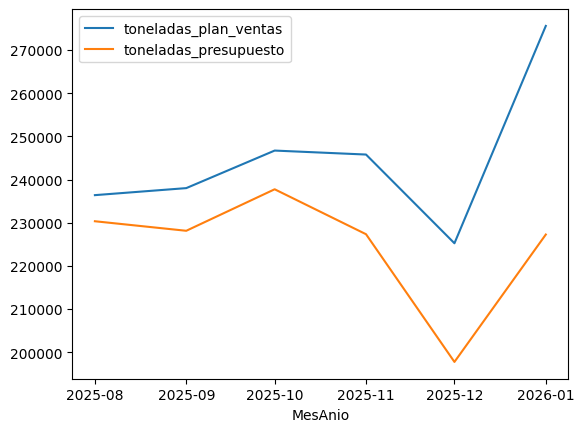

In [5]:
pvo.groupby("MesAnio").agg({"toneladas_plan_ventas":"sum", "toneladas_presupuesto" :"sum"}).plot()

In [6]:
fact = pd.read_csv(r".\consultas\fact.csv", engine="pyarrow")

fact.nom_familia_asociada = fact.nom_familia_asociada.str.replace(r'\s+|\t+', ' ', regex=True)

fact.nom_ubicacion = fact.nom_ubicacion.str.replace(r'\s+|\t+', ' ', regex=True)

fact["Base"] = "fact"

fact = fact[(fact.MesAnio >= min_date_2) & (fact.MesAnio >= min_date_2) ]

fact["MesAct_fact"] = np.where( fact.MesAnio == actual_date, True, False)

fact.nom_familia_asociada = np.where(fact.nom_familia_asociada.isna(), fact.nom_articulo, fact.nom_familia_asociada) 

fact.MesAnio.nunique()

20

C:\Users\adojeda\AppData\Local\Temp\ipykernel_22120\1531956267.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2015-01-01', periods=periods, freq='M')
C:\Users\adojeda\AppData\Local\Temp\ipykernel_22120\1531956267.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')
c:\Users\adojeda\OneDrive - deacero.com\dev\0_envs\.bigquery\Lib\site-packages\statsmodels\tsa\filters\hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


Resultados de pruebas estadísticas:

ADF p-value: 0.6597 (H0: no estacionaria)
KPSS p-value: 0.0100 (H0: estacionaria)
Ljung-Box p-value: 0.0000 (H0: no autocorrelación)
Chow Test p-value: 0.0000 (H0: sin ruptura estructural)


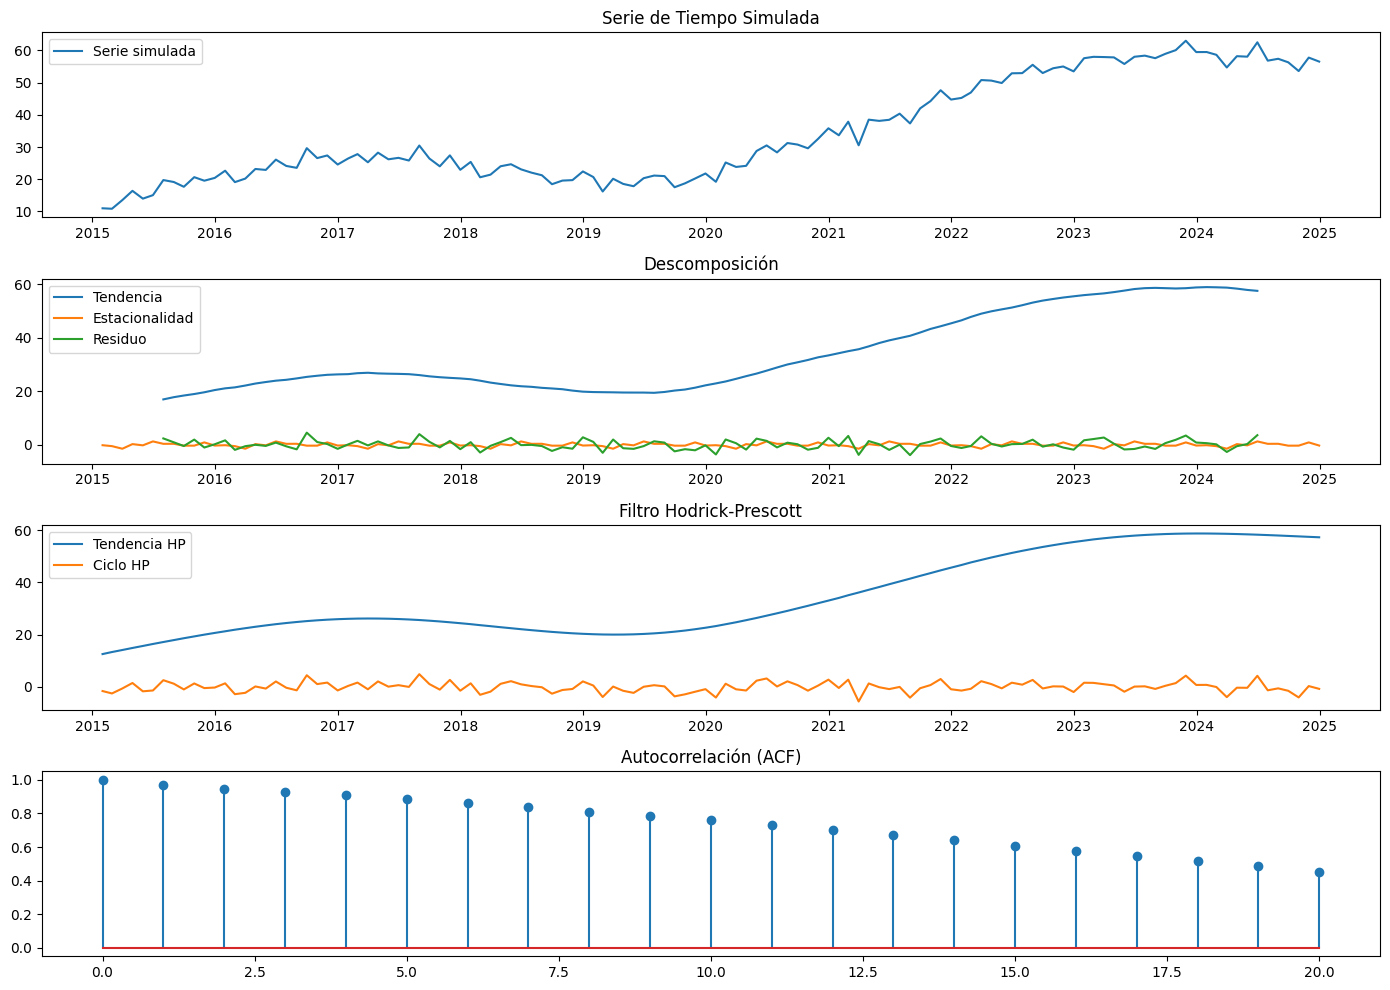

In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from scipy.stats import norm

# Simular datos de series de tiempo con varios comportamientos
np.random.seed(42)
periods = 120
trend = np.linspace(10, 50, periods)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, periods))
noise = np.random.normal(0, 2, periods)
structural_break = np.array([5 if i > 60 else 0 for i in range(periods)])

data = trend + seasonality + noise + structural_break

dates = pd.date_range(start='2015-01-01', periods=periods, freq='M')
series = pd.Series(data, index=dates)

# Descomposición de la serie
decomposition = seasonal_decompose(series, model='additive')

# Pruebas estadísticas
adf_result = adfuller(series)
kpss_result = kpss(series, regression='c')
ljung_box_result = acorr_ljungbox(series, lags=[12], return_df=True)

# Filtro HP para detectar ciclos
cycle, trend_hp = hpfilter(series, lamb=1600)

# Chow Test simulado: comparar regresión antes y después del punto de quiebre
break_point = 60
X1 = add_constant(np.arange(break_point))
X2 = add_constant(np.arange(periods - break_point))
model1 = OLS(series[:break_point], X1).fit()
model2 = OLS(series[break_point:], X2).fit()
RSS1 = sum(model1.resid ** 2)
RSS2 = sum(model2.resid ** 2)
RSS_combined = sum(OLS(series, add_constant(np.arange(periods))).fit().resid ** 2)
k = 2  # número de parámetros
chow_stat = ((RSS_combined - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (periods - 2 * k))
p_value_chow = 1 - norm.cdf(chow_stat)

# Visualizaciones
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(series, label='Serie simulada')
plt.title('Serie de Tiempo Simulada')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.plot(decomposition.resid, label='Residuo')
plt.title('Descomposición')
plt.legend()

plt.subplot(413)
plt.plot(trend_hp, label='Tendencia HP')
plt.plot(cycle, label='Ciclo HP')
plt.title('Filtro Hodrick-Prescott')
plt.legend()

plt.subplot(414)
plt.stem(acf(series, nlags=20))
plt.title('Autocorrelación (ACF)')

plt.tight_layout()
plt.savefig("temporal_analysis_notebook.png")

# Resultados de pruebas
print("Resultados de pruebas estadísticas:\n")
print(f"ADF p-value: {adf_result[1]:.4f} (H0: no estacionaria)")
print(f"KPSS p-value: {kpss_result[1]:.4f} (H0: estacionaria)")
print(f"Ljung-Box p-value: {ljung_box_result.iloc[0, 1]:.4f} (H0: no autocorrelación)")
print(f"Chow Test p-value: {p_value_chow:.4f} (H0: sin ruptura estructural)")
